In [3]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from tabulate import tabulate

In [5]:
# Read data
rideshare_data = pd.read_csv("/content/drive/MyDrive/IS670_data/rideshare_kaggle.csv")
rideshare_data.head()

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

           datetime          timezone            source    destination  \
0  16-12-2018 09:30  America/New_York  Haymarket Square  North Station   
1  27-11-2018 02:00  America/New_York  Haymarket Square  North Station   
2  28-11-2018 01:00  America/New_York  Haymarket Square  North Station   
3  30-11-2018 04:53  America/New_York  Haymarket Square  North Station   
4  29-11-2018 03:49  America/New_York  Haymarket Square  North Station   

  cab_type  ... precipIntensityMax   uvIndexTime  temperatureMin  \
0     Lyft  ...             0.1276  1.544980e+09           39.89   
1     Lyft  ...             0.1300  1.543252e+09           40.49   
2     Lyft  ...             0.1064  1.543338e+09           35.36   
3     Lyft  ...             0.0000  1.543507e+09           34.67   
4     Lyft  ...             0.0001  1.543421e+09           33.10   

   temperatureMinTime  temperatureMax  temperatureMaxTime  \
0        1.545012e+09           43.68        1.544969e+09   
1        1.543234e+09           47.30        1.543252e+09   
2        1.543378e+09           47.55        1.543320e+09   
3        1.543550e+09           45.03        1.543511e+09   
4        1.543403e+09           42.18        1.543421e+09   

   apparentTemperatureMin  apparentTemperatureMinTime  apparentTemperatureMax  \
0                   33.73                1.545012e+09                   38.07   
1                   36.20                1.543291e+09                   43.92   
2                   31.04                1.543378e+09                   44.12   
3                   30.30                1.543550e+09                   38.53   
4                   29.11                1.543392e+09                   35.75   

  apparentTemperatureMaxTime  
0               1.544958e+09  
1               1.543252e+09  
2               1.543320e+09  
3               1.543511e+09  
4               1.543421e+09  

[5 rows x 57 columns]

In [6]:
#Shape of the data to check the volume of records
rideshare_data.shape

(539038, 57)

56 Features
Target variable - 'price'

In [7]:
#Retrieving the columns/ features of the customer data
rideshare_data.keys()

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

1. id: Unique identifier for each ride.

2. timestamp: Time when the ride occurred. Number of milliseconds elapsed from the enoch (Standard benchmark based on the system). Other time features can be engineered from the timestamp.

3. hour, day, month: Breakdown of the timestamp into hour, day, and month components for easier analysis.

4. datetime: Full timestamp including date and time.

5. timezone: Timezone information.

6. source, destination: Starting and ending points of the ride.

7. cab_type: Type of cab used (e.g., regular, luxury).

8. product_id, name: Identifier and name of the ride product.

9. price: Price of the ride.

10. distance: Distance traveled during the ride. Assuming the unit of measurement is the US standard distance unit of miles.

11. surge_multiplier: Surge pricing multiplier (if applicable).

12. latitude, longitude: Coordinates of the source and destination.

13. temperature, apparentTemperature: Temperature and apparent temperature during the ride. Apparent temperature takes into account the humidity, wind speeds and others to empirically  measure what the temperature feels like to humans and it is subjective. Not a very reliable measure.

14. short_summary, long_summary: Short and long descriptions of the weather conditions. Categories of summary, could be longer and varied - text processing could be explored further for crisp categories. Short summary is the weather observation at the particular time of the day while long summary is the weather forecast for the entire day.  

15. precipIntensity, precipProbability: Intensity is precipitation observed at the given time and probability of precipitation at the given time. Probability values are subjective.

16. humidity: Humidity level as %.

17. windSpeed, windGust, windGustTime, windBearing: Wind speed, gust (sudden high speed winds like ones prevailing storm), and related information. Wind bearing is the degree of the wind with 0 degrees as the north direction.

18. visibility: Visibility during the ride. Maximum distance discerned by the naked eye. Units of measurement unknown.

19. temperatureHigh, temperatureLow, temperatureHighTime, temperatureLowTime: Highest and lowest temperatures during the day and corresponding times.

20. apparentTemperatureHigh, apparentTemperatureLow, apparentTemperatureHighTime, apparentTemperatureLowTime: Highest and lowest apparent temperatures during the day and corresponding times.

icon: Weather icon representation.
dewPoint, pressure, cloudCover, uvIndex, ozone, sunriseTime, sunsetTime, moonPhase, precipIntensityMax, uvIndexTime, temperatureMin, temperatureMinTime, temperatureMax, temperatureMaxTime, apparentTemperatureMin, apparentTemperatureMinTime, apparentTemperatureMax, apparentTemperatureMaxTime: Additional weather-related features.

Checking if the id is a unique identifier for all the rides or of a user. The id is unique for each records and hence each ride

The column names are already in standardized format of lowercase and underscores for spaces for compatability.

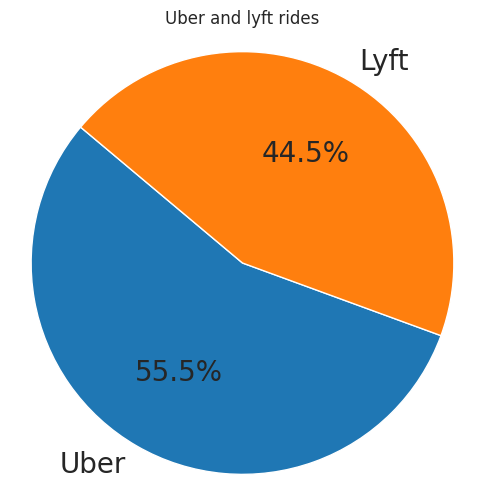

In [8]:
# Calculate counts of each category
category_counts = rideshare_data['cab_type'].value_counts()

# Set Seaborn style
sns.set_style("whitegrid")

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 20})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Uber and lyft rides')
plt.show()

In [9]:
rideshare_data['id'].nunique()

539038

There is only ride data for the months of November and December. We would not be able to derive much of the seasonal trends informations from the dataset.

In [10]:
rideshare_data['month'].unique()

array([12, 11])

The rideshare data is particularly from Boston and has only one timezone of 'Americs/ New_York' and hence this column can be dropped without much predictive power.

In [11]:
rideshare_data['timezone'].unique()

array(['America/New_York'], dtype=object)

In [12]:
# Splitting the datasets to uber and lyft rides respectively
uber_rideshare_data = rideshare_data[rideshare_data['cab_type']=='Uber'];
lyft_rideshare_data = rideshare_data[rideshare_data['cab_type']=='Lyft'];


In [13]:
uber_rideshare_data.shape

(299310, 57)

We can see that there are 299310 Uber rides.

In [14]:
lyft_rideshare_data.shape

(239728, 57)

We can see that there are 239728 Lyft rides.

## Data Pre-Processing

In [15]:
# Creating a copy of the customer data to refer to and retrieve back the original data
processed_rideshare_data = rideshare_data.copy()

# 1.1 Dropping timezone and id columns which have lower predictive power and only serve identification purpose respectively.
columns_to_drop = ['timezone', 'id']
processed_rideshare_data.drop(columns=columns_to_drop, inplace=True)

In [16]:
processed_rideshare_data.head()

timestamp  hour  day  month          datetime            source  \
0  1.544953e+09     9   16     12  16-12-2018 09:30  Haymarket Square   
1  1.543284e+09     2   27     11  27-11-2018 02:00  Haymarket Square   
2  1.543367e+09     1   28     11  28-11-2018 01:00  Haymarket Square   
3  1.543554e+09     4   30     11  30-11-2018 04:53  Haymarket Square   
4  1.543463e+09     3   29     11  29-11-2018 03:49  Haymarket Square   

     destination cab_type    product_id          name  ...  \
0  North Station     Lyft     lyft_line        Shared  ...   
1  North Station     Lyft  lyft_premier           Lux  ...   
2  North Station     Lyft          lyft          Lyft  ...   
3  North Station     Lyft   lyft_luxsuv  Lux Black XL  ...   
4  North Station     Lyft     lyft_plus       Lyft XL  ...   

   precipIntensityMax   uvIndexTime  temperatureMin  temperatureMinTime  \
0              0.1276  1.544980e+09           39.89        1.545012e+09   
1              0.1300  1.543252e+09           40.49        1.543234e+09   
2              0.1064  1.543338e+09           35.36        1.543378e+09   
3              0.0000  1.543507e+09           34.67        1.543550e+09   
4              0.0001  1.543421e+09           33.10        1.543403e+09   

   temperatureMax  temperatureMaxTime  apparentTemperatureMin  \
0           43.68        1.544969e+09                   33.73   
1           47.30        1.543252e+09                   36.20   
2           47.55        1.543320e+09                   31.04   
3           45.03        1.543511e+09                   30.30   
4           42.18        1.543421e+09                   29.11   

  apparentTemperatureMinTime apparentTemperatureMax  \
0               1.545012e+09                  38.07   
1               1.543291e+09                  43.92   
2               1.543378e+09                  44.12   
3               1.543550e+09                  38.53   
4               1.543392e+09                  35.75   

   apparentTemperatureMaxTime  
0                1.544958e+09  
1                1.543252e+09  
2                1.543320e+09  
3                1.543511e+09  
4                1.543421e+09  

[5 rows x 55 columns]

In [17]:
# 1.2 Examining unique values of product id
rideshare_data['product_id'].unique()

array(['lyft_line', 'lyft_premier', 'lyft', 'lyft_luxsuv', 'lyft_plus',
       'lyft_lux', '6f72dfc5-27f1-42e8-84db-ccc7a75f6969',
       '6c84fd89-3f11-4782-9b50-97c468b19529',
       '55c66225-fbe7-4fd5-9072-eab1ece5e23e',
       '9a0e7b09-b92b-4c41-9779-2ad22b4d779d',
       '6d318bcc-22a3-4af6-bddd-b409bfce1546',
       '997acbb5-e102-41e1-b155-9df7de0a73f2',
       '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a'], dtype=object)

In [18]:
# Exploring the unique product ids by ride share service
unique_product_ids_by_cab_type = rideshare_data.groupby('cab_type')['product_id'].unique()

# Print of result
for cab_type, product_ids in unique_product_ids_by_cab_type.items():
    print(cab_type, product_ids)

Lyft ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux']
Uber ['6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2'
 '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a']


The product ids of Lyft are interpretable while Uber has encoded and uninterpretable product types. For readability, the product ids of Uber could be changed to uber_type# for further exploration.

In [19]:
# Defining a mapping dictionary for Uber product types
product_type_mapping = {
    '6f72dfc5-27f1-42e8-84db-ccc7a75f6969': 'uber_type1',
    '6c84fd89-3f11-4782-9b50-97c468b19529': 'uber_type2',
    '55c66225-fbe7-4fd5-9072-eab1ece5e23e': 'uber_type3',
    '9a0e7b09-b92b-4c41-9779-2ad22b4d779d': 'uber_type4',
    '6d318bcc-22a3-4af6-bddd-b409bfce1546': 'uber_type5',
    '997acbb5-e102-41e1-b155-9df7de0a73f2': 'uber_type6',
    '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a': 'uber_type7',
}

# Mapping product IDs to product types using the mapping dictionary
processed_rideshare_data['product_id'].replace(product_type_mapping, inplace=True)


In [20]:
# Reexamining the group types

unique_product_ids_by_cab_type = processed_rideshare_data.groupby('cab_type')['product_id'].unique()

# Print of result
for cab_type, product_ids in unique_product_ids_by_cab_type.items():
    print(cab_type, product_ids)

Lyft ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux']
Uber ['uber_type1' 'uber_type2' 'uber_type3' 'uber_type4' 'uber_type5'
 'uber_type6' 'uber_type7']


There is a corresponding name column for the product_id. It is explored whether the mapping of product ids to their names are consistent throughout the dataset to determine if there is any duplication in categories or exists only for readability purpose.

In [21]:
processed_rideshare_data['product_id'].unique()

array(['lyft_line', 'lyft_premier', 'lyft', 'lyft_luxsuv', 'lyft_plus',
       'lyft_lux', 'uber_type1', 'uber_type2', 'uber_type3', 'uber_type4',
       'uber_type5', 'uber_type6', 'uber_type7'], dtype=object)

In [22]:
# Dictionary of values are retrieved from the first occurence of unique product id values and their corresponding name column values.
mapping_dict = {
    'lyft_line': 'Shared',
    'lyft_premier': 'Lux',
    'lyft': 'Lyft',
    'lyft_luxsuv': 'Lux Black XL',
    'lyft_plus': 'Lyft XL',
    'lyft_lux' : 'Lux Black',
    'uber_type1': 'UberXL',
    'uber_type2': 'Black',
    'uber_type3': 'UberX',
    'uber_type4': 'WAV',
    'uber_type5': 'Black SUV',
    'uber_type6': 'UberPool',
    'uber_type7': 'Taxi'
}


# Checking if each record's product_id is matched correctly to the corresponding value in the mapping dictionary
fail = False
for index, row in processed_rideshare_data.iterrows():
    product_id = row['product_id']
    name = row['name']
    #if the product id is present, get the maaping value or give None data type
    mapping_value = mapping_dict.get(product_id, None)
    if mapping_value != name:
        fail = True
        print(name)
        print(product_id)
        break
    else:
        pass
if fail:
  print("ok")

In [23]:
processed_rideshare_data.drop(columns='product_id', inplace=True)

In [24]:
processed_rideshare_data.shape

(539038, 54)

In [25]:
rideshare_data['short_summary'].unique()

array([' Mostly Cloudy ', ' Rain ', ' Clear ', ' Partly Cloudy ',
       ' Overcast ', ' Light Rain ', ' Foggy ', ' Possible Drizzle ',
       ' Drizzle ', ' Ove'], dtype=object)

In [26]:
rideshare_data['icon'].unique()

array([' partly-cloudy-night ', ' rain ', ' clear-night ', ' cloudy ',
       ' fog ', ' clear-day ', ' partly-cloudy-day ', nan], dtype=object)

In [27]:
processed_rideshare_data.drop(columns='short_summary', inplace=True)

In [28]:
rideshare_data['long_summary'].unique()

array([' Rain throughout the day. ',
       ' Rain until morning, starting again in the evening. ',
       ' Light rain in the morning. ',
       ' Partly cloudy throughout the day. ',
       ' Mostly cloudy throughout the day. ',
       ' Light rain in the morning and overnight. ',
       ' Light rain until evening. ', ' Foggy in the morning. ',
       ' Overcast throughout the day. ',
       ' Possible drizzle in the morning. ',
       ' Rain in the morning and afternoon. ', nan], dtype=object)

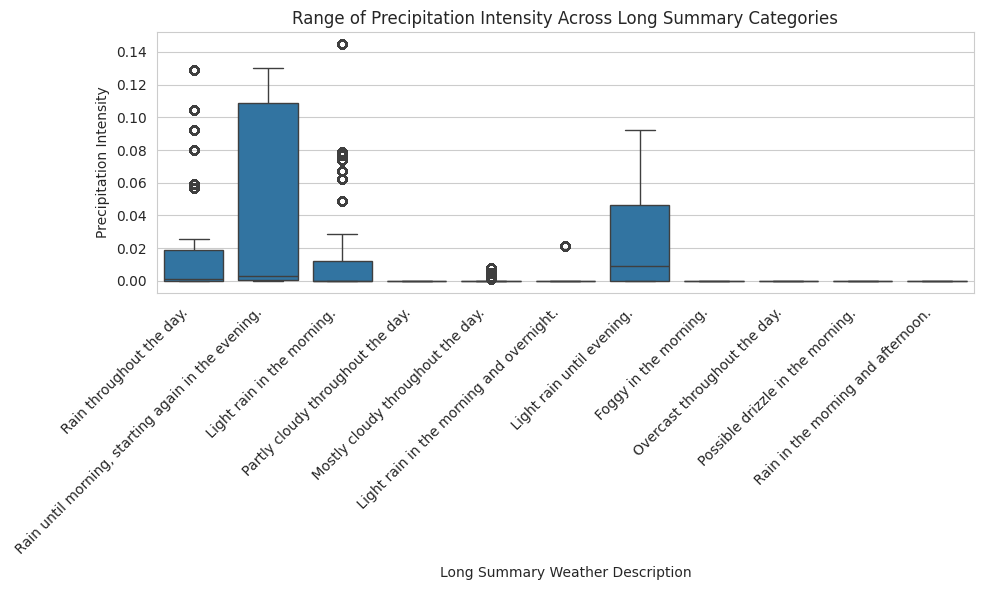

In [29]:
# Creating a boxplot to visualize the range of precipitation intensity across different long summary categories of weather description
plt.figure(figsize=(10, 6))
sns.boxplot(x='long_summary', y='precipIntensity', data=rideshare_data)
plt.xlabel('Long Summary Weather Description')
plt.ylabel('Precipitation Intensity')
plt.title('Range of Precipitation Intensity Across Long Summary Categories')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

The source of the dataset in unclear and hence, the precipitation intensity, short description and long description summary of the weather conditions are visualized to explore weather it indicates the real time/ predicted weather conditions recorded and whether it is throughout the day or at the given hour/ time of start of the ride.  

-- The long description categories such as "Rain until morning, starting again in the evening"/ "Possible drizzle in the morning" indicate temporal future reference and likely indicates the weather forecast throughout the day.

-- The precipitation intensity values and the short summary are consistent throughout with "Mostly cloudy"/ "Partly Cloudy"/ "Clear"/ "Overcast" recording no or meagre rainfall while "Drizzle", "Light Rain" and "Rain" weather conditions have an increasing gradient of precipitation accordingly. This suggests that precipitation intensity and short summary are actual weather conditions at a given time.

-- The long summary does not correlate with precipitation intensity moreover with categories like "Rain in the morning and afternoon" having 0 precipitation. This could neither be a proper prediction/ actual value recorded throughout the day.



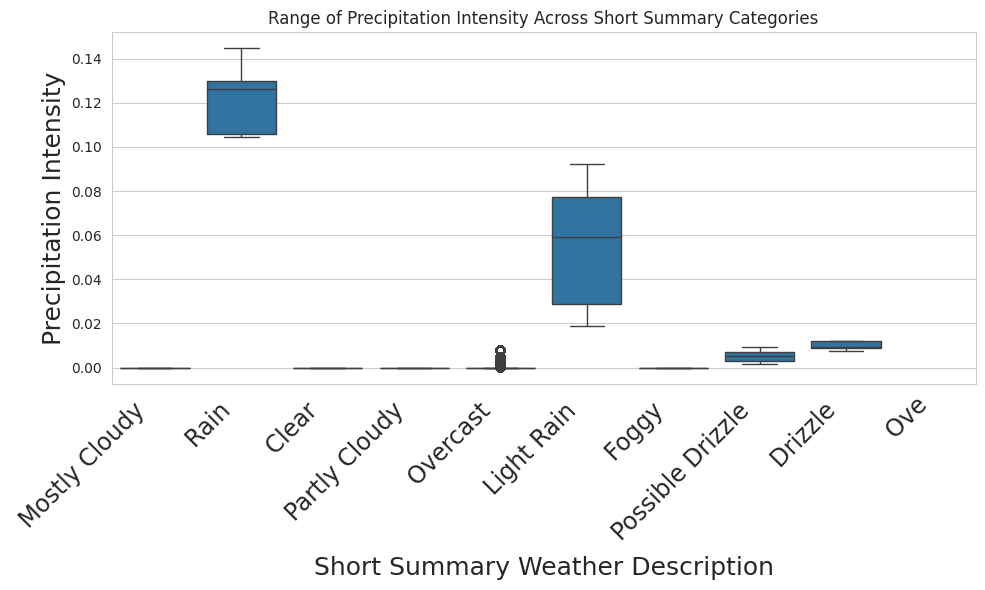

In [30]:
# Creating a boxplot to visualize the range of precipitation intensity across different long summary categories of weather description
plt.figure(figsize=(10, 6))
sns.boxplot(x='short_summary', y='precipIntensity', data=rideshare_data)
plt.xlabel('Short Summary Weather Description', fontsize = 18)
plt.ylabel('Precipitation Intensity', fontsize = 18)
plt.title('Range of Precipitation Intensity Across Short Summary Categories')
plt.xticks(rotation=45, ha='right', fontsize = 17)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

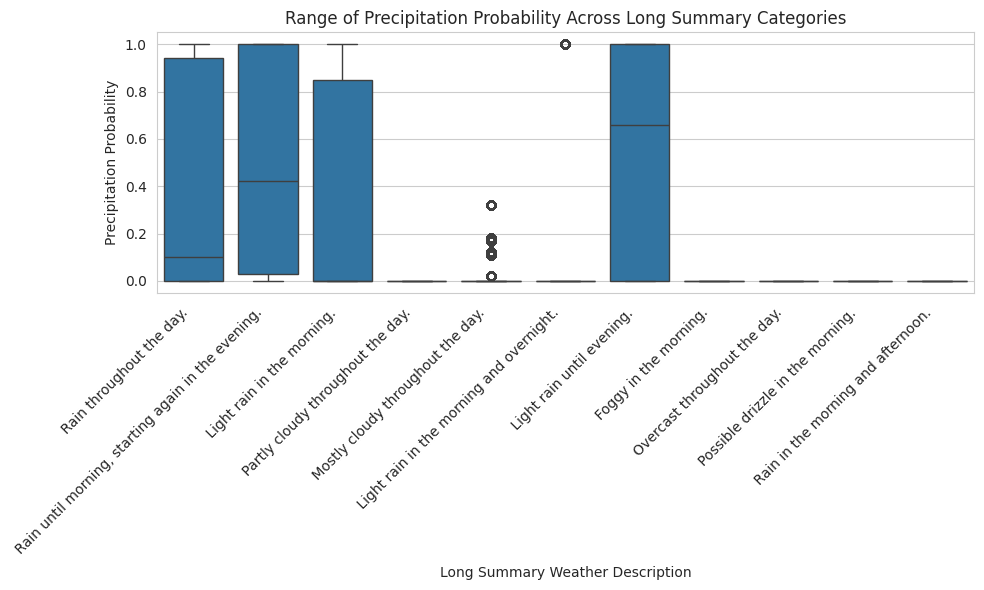

In [31]:
# Creating a boxplot to visualize the range of precipitation intensity across different long summary categories of weather description
plt.figure(figsize=(10, 6))
sns.boxplot(x='long_summary', y='precipProbability', data=rideshare_data)
plt.xlabel('Long Summary Weather Description')
plt.ylabel('Precipitation Probability')
plt.title('Range of Precipitation Probability Across Long Summary Categories')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

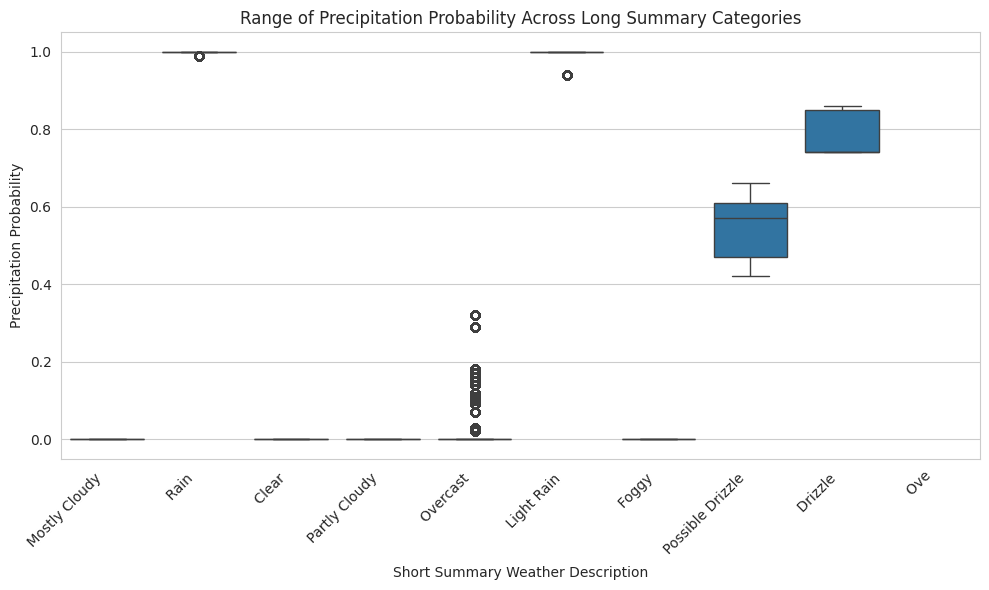

In [32]:
# Creating a boxplot to visualize the range of precipitation intensity across different long summary categories of weather description
plt.figure(figsize=(10, 6))
sns.boxplot(x='short_summary', y='precipProbability', data=rideshare_data)
plt.xlabel('Short Summary Weather Description')
plt.ylabel('Precipitation Probability')
plt.title('Range of Precipitation Probability Across Long Summary Categories')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

The "Mostly Cloudy"/ "Clear"/ "Overcast" hours of the days are all given a 0 precipitation prediction accordingly compared to inconsistencies like no probability for "Rain in the morning and afternoon" weather forecast in the long description for the entire day. The precipitation probability is more aligned with the short description of the weather at the given time of the day rather than the long description indication weather prediction throughout the day and is also more correlated with the precipitation intensity at the given time of the day.

Similarly, the temperature highs and lows are explored as well to analyse if they indicate values for the particular hour of throughout the day.

In [33]:
# Filter the DataFrame based on the specified criteria
filtered_df = rideshare_data[(rideshare_data['hour'].isin([0, 1, 2])) & (rideshare_data['month'] == 12) & (rideshare_data['day'] == 1)]

# Display unique values for each feature
unique_temperature_high = filtered_df['temperatureHigh'].unique()
unique_temperature_low = filtered_df['temperatureLow'].unique()
unique_temperature_high_time = filtered_df['temperatureHighTime'].unique()
unique_temperature_low_time = filtered_df['temperatureLowTime'].unique()

# Print the unique values
print("Unique values of temperatureHigh:", unique_temperature_high)
print("Unique values of temperatureLow:", unique_temperature_low)
print("Unique values of temperatureHighTime:", unique_temperature_high_time)
print("Unique values of temperatureLowTime:", unique_temperature_low_time)

Unique values of temperatureHigh: [42.57 42.05 42.32]
Unique values of temperatureLow: [31.48 31.31 31.57]
Unique values of temperatureHighTime: [1.5436008e+09]
Unique values of temperatureLowTime: [1.5436584e+09 1.5436620e+09 1.5436656e+09]


The temperature highs and lows have more than one unique value from midnight to 2 AM of a particular date in the dataset which indicates that the features are for the given specific hour. The Temperature high time and low time

In [34]:

# Checking for null values (NaN or None object type) per feature to omit
processed_rideshare_data.isnull().sum()

timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
source                             0
destination                        0
cab_type                           0
name                               0
price                          42771
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
long_summary                       1
precipIntensity                    1
precipProbability                  1
humidity                           1
windSpeed                          1
windGust                           1
windGustTime                       1
visibility                         1
temperatureHigh                    1
temperatureHighTime                1
temperatureLow                     1
t

There are 55094 records of the price target variable with null values. While this is considerable, back filling the na values with mean/ median/ mode values could result in reduction of model accuracy and hence, despite the loss of information, these records are omitted from the dataset.

<ipython-input-35-5295b622c266>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='NullCount', data=null_counts, palette='viridis')


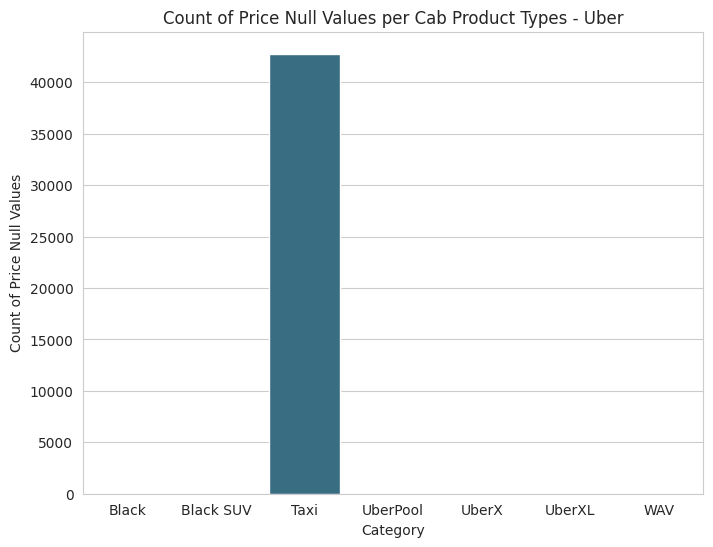

In [35]:
# Checking the could of price null values per cab product names within the ride sharing platforms Uber and Lyft

# Uber price null values

# Calculate count of price null values per category
null_counts = uber_rideshare_data.groupby('name')['price'].apply(lambda x: x.isnull().sum()).reset_index(name='NullCount')

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='NullCount', data=null_counts, palette='viridis')
plt.title('Count of Price Null Values per Cab Product Types - Uber')
plt.xlabel('Category')
plt.ylabel('Count of Price Null Values')
plt.show()

In [36]:
df = uber_rideshare_data.copy()
df['ridesCount'] = df['name'].value_counts()
df.head()

id     timestamp  hour  day  month  \
12  009e9c53-074d-43cf-aef2-0fbc7a47ed3d  1.543616e+09    22   30     11   
13  23f145da-f0c1-4d1f-a184-496bc003a7db  1.544698e+09    10   13     12   
14  357559cb-8c58-4278-a41a-e33b2e0997a3  1.544729e+09    19   13     12   
15  50ef1165-9d23-416c-a65c-18906207b295  1.545005e+09    23   16     12   
16  91c4861c-1780-42b0-bca1-bbd64a422cc3  1.544748e+09     0   14     12   

            datetime          timezone     source destination cab_type  ...  \
12  30-11-2018 22:13  America/New_York  North End    West End     Uber  ...   
13  13-12-2018 10:50  America/New_York  North End    West End     Uber  ...   
14  13-12-2018 19:15  America/New_York  North End    West End     Uber  ...   
15  16-12-2018 23:55  America/New_York  North End    West End     Uber  ...   
16  14-12-2018 00:40  America/New_York  North End    West End     Uber  ...   

     uvIndexTime temperatureMin  temperatureMinTime  temperatureMax  \
12  1.543594e+09          28.79        1.543579e+09           42.52   
13  1.544717e+09          18.29        1.544688e+09           33.83   
14  1.544717e+09          18.29        1.544688e+09           33.83   
15  1.544980e+09          39.22        1.544954e+09           43.83   
16  1.544717e+09          18.29        1.544688e+09           33.83   

    temperatureMaxTime  apparentTemperatureMin  apparentTemperatureMinTime  \
12        1.543601e+09                   26.41                1.543576e+09   
13        1.544731e+09                   13.79                1.544688e+09   
14        1.544731e+09                   13.79                1.544688e+09   
15        1.544990e+09                   33.98                1.545019e+09   
16        1.544731e+09                   13.79                1.544688e+09   

    apparentTemperatureMax  apparentTemperatureMaxTime ridesCount  
12                   40.53                1.543612e+09        NaN  
13                   32.85                1.544735e+09        NaN  
14                   32.85                1.544735e+09        NaN  
15                   38.38                1.544987e+09        NaN  
16                   32.85                1.544735e+09        NaN  

[5 rows x 58 columns]

In [37]:
# Count of rides per cab type in Uber

category_counts = rideshare_data['name'].value_counts().reset_index()
category_counts.columns = ['Cab product Type', 'Count of Rides']
# Display category_counts as a table
print(tabulate(category_counts, headers='keys', tablefmt='psql'))

+----+--------------------+------------------+
|    | Cab product Type   |   Count of Rides |
|----+--------------------+------------------|
|  0 | WAV                |            42792 |
|  1 | UberPool           |            42776 |
|  2 | Taxi               |            42771 |
|  3 | Black SUV          |            42752 |
|  4 | UberX              |            42746 |
|  5 | UberXL             |            42741 |
|  6 | Black              |            42732 |
|  7 | Lux Black XL       |            39971 |
|  8 | Lux Black          |            39968 |
|  9 | Lux                |            39955 |
| 10 | Shared             |            39947 |
| 11 | Lyft               |            39945 |
| 12 | Lyft XL            |            39942 |
+----+--------------------+------------------+


The Ride Share Price Data has not been obtained for all of

In [38]:
processed_rideshare_data = processed_rideshare_data[processed_rideshare_data['name'] != 'Taxi']

In [39]:
processed_rideshare_data.shape

(496267, 53)

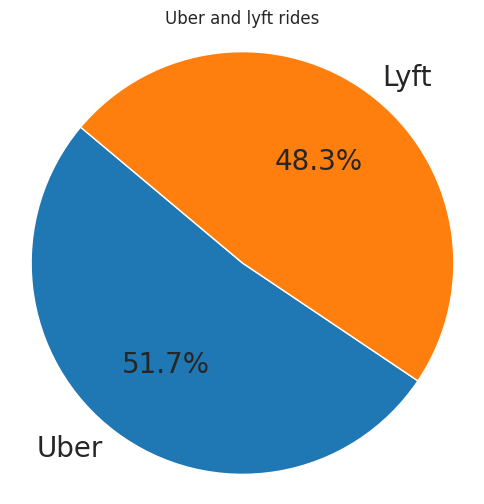

In [40]:
# Calculate counts of each category
category_counts = processed_rideshare_data['cab_type'].value_counts()

# Set Seaborn style
sns.set_style("whitegrid")

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 20})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Uber and lyft rides')
plt.show()

In [41]:
# Checking for null values (NaN or None object type) per feature to omit
processed_rideshare_data.isnull().sum()

timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
source                         0
destination                    0
cab_type                       0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
long_summary                   1
precipIntensity                1
precipProbability              1
humidity                       1
windSpeed                      1
windGust                       1
windGustTime                   1
visibility                     1
temperatureHigh                1
temperatureHighTime            1
temperatureLow                 1
temperatureLowTime             1
apparentTemperatureHigh        1
apparentTemperatureHighTime    1
apparentTe

In [42]:
processed_rideshare_data.dtypes

timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
source                          object
destination                     object
cab_type                        object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                       float64
windGustTime                   float64
visibility                     float64
temperatureHigh                float64
temperatureHighTime      

In [43]:
# Converting features with interpretable categories as "category" data type for better manipulation and memory efficiency
columns_list = ['cab_type', 'icon', 'long_summary', 'name', 'source', 'destination']

# Convert specified columns to category data type
processed_rideshare_data[columns_list] = processed_rideshare_data[columns_list].astype('category')

In [44]:
processed_rideshare_data.dtypes

timestamp                       float64
hour                              int64
day                               int64
month                             int64
datetime                         object
source                         category
destination                    category
cab_type                       category
name                           category
price                           float64
distance                        float64
surge_multiplier                float64
latitude                        float64
longitude                       float64
temperature                     float64
apparentTemperature             float64
long_summary                   category
precipIntensity                 float64
precipProbability               float64
humidity                        float64
windSpeed                       float64
windGust                        float64
windGustTime                    float64
visibility                      float64
temperatureHigh                 float64


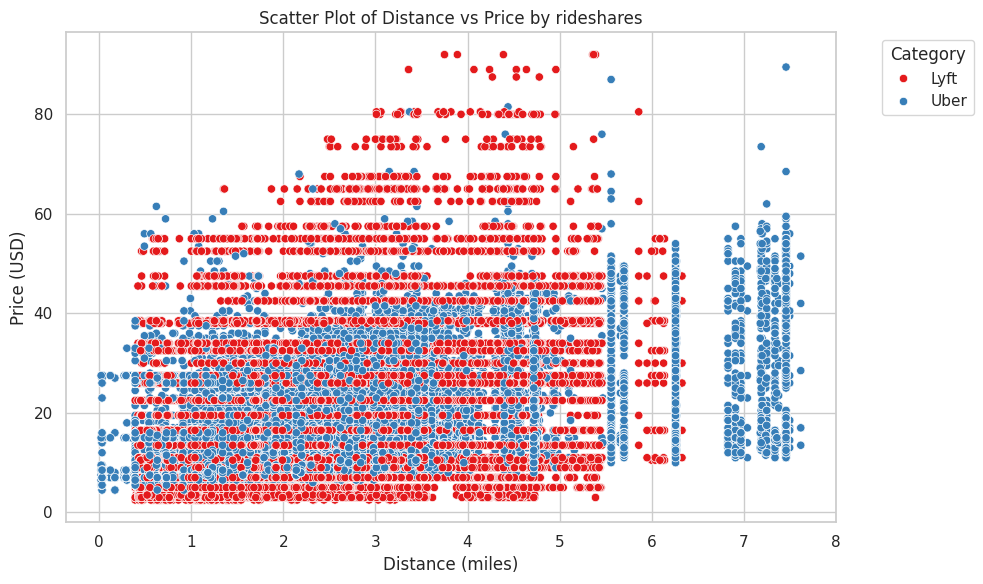

In [45]:
## Visualization of distance vs price for Uber and Lyft rideshares

# Define plot style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=processed_rideshare_data, x='distance', y='price', hue='cab_type', palette='Set1')

# Set labels and title
plt.xlabel('Distance (miles)')
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of Distance vs Price by rideshares')

# Show plot
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Long distance trips are largely accepted by Uber compared to Lyft and Lyft prices vary a higher range compared to Uber. Lyft records both the minimum and maximum fare for rides. Price does not linearly change per distance and the trend varies per cab company.

It would be interesting to investigate this further per cab types for each platform.

Lyft vs Uber

Lyft ordinary ride fare is comparable to UberX
Lux Black XL is comparable to Black SUV
Lyft XL is comparable to UberXL
Shared is comparable to UberPool

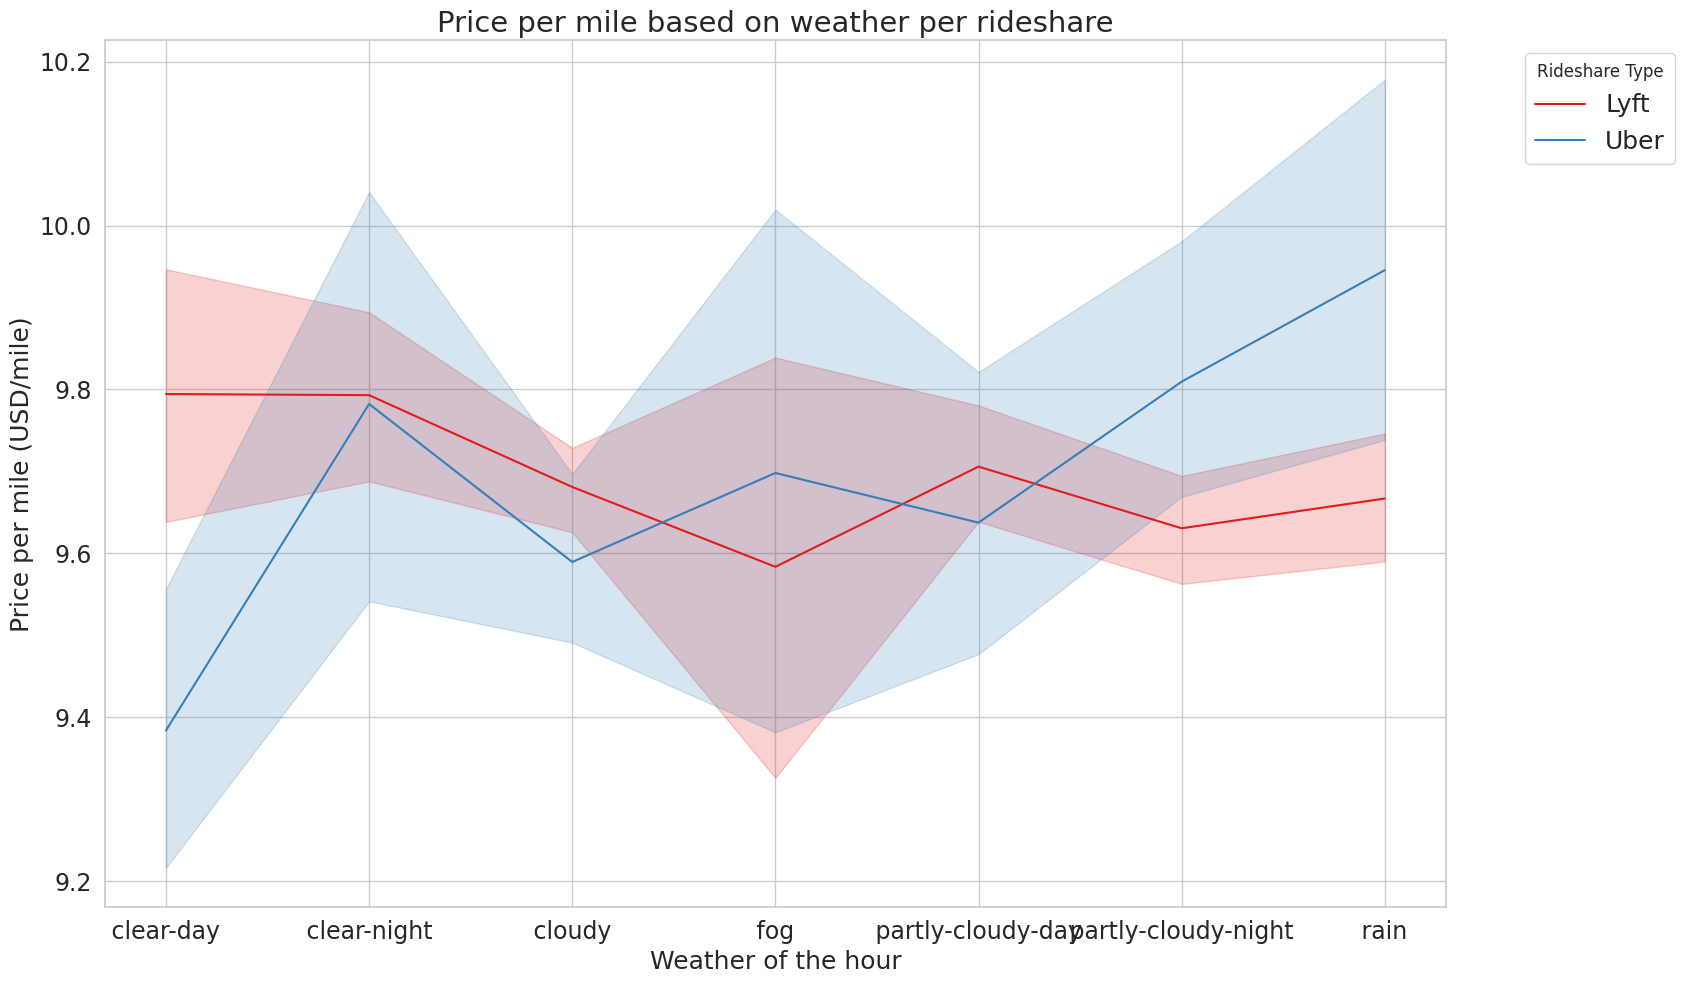

In [46]:
## Comparison of price per mile based on short description of the weather in the hour per rideshare

## Additional column of price for further analysis
processed_rideshare_data['price_per_mile'] = processed_rideshare_data['price'] / processed_rideshare_data['distance']

# Define plot style
sns.set(style="whitegrid")

# Create line plot with hue
plt.figure(figsize=(17, 10))
sns.lineplot(data=processed_rideshare_data, x='icon', y='price_per_mile', hue='cab_type', palette='Set1')

# Set labels and title
plt.xlabel('Weather of the hour', fontsize=18)
plt.ylabel('Price per mile (USD/mile)', fontsize=18)
plt.title('Price per mile based on weather per rideshare', fontsize=21)

# Increase fontsize of ticks
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Show plot
plt.legend(title='Rideshare Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18)
plt.tight_layout()
plt.show()

In [47]:
## Comparison of Ride Counts based on short description of the weather in the hour per rideshare

df = processed_rideshare_data.groupby('cab_type')['icon'].value_counts().reset_index(name='count')

df.head()

cab_type                   icon  count
0     Lyft                cloudy   75773
1     Lyft   partly-cloudy-night   54831
2     Lyft     partly-cloudy-day   39862
3     Lyft                  rain   35638
4     Lyft           clear-night   21075

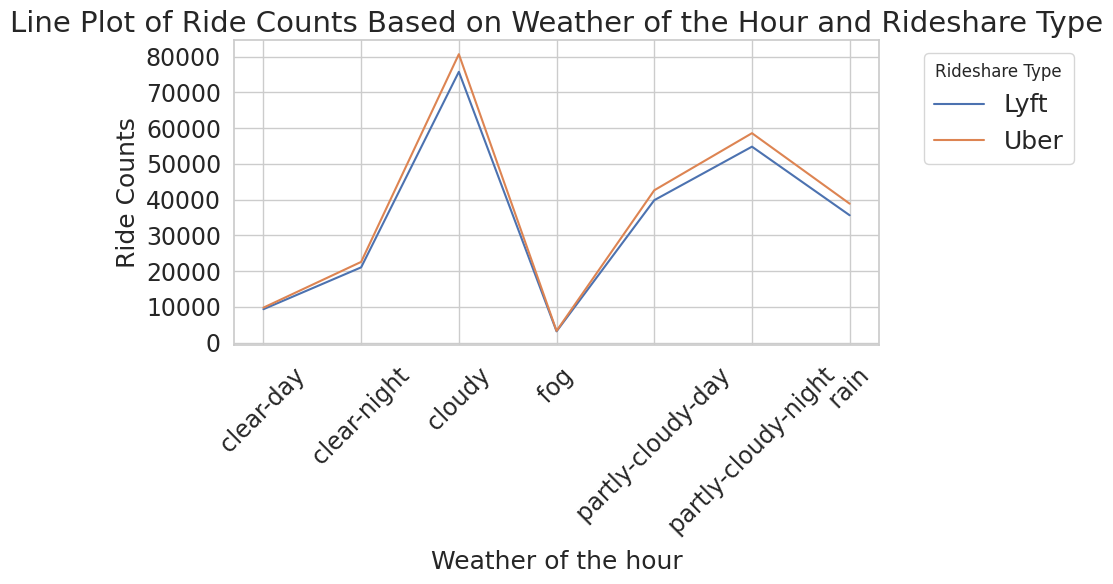

In [48]:
## Comparison of Ride Counts based on short description of the weather in the hour per rideshare

# Define plot style
sns.set(style="whitegrid")

# Create line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='icon', y='count', hue='cab_type')

# Set labels and title
plt.xlabel('Weather of the hour', fontsize=18)
plt.ylabel('Ride Counts', fontsize=18)
plt.title('Line Plot of Ride Counts Based on Weather of the Hour and Rideshare Type', fontsize=21)

# Increase fontsize of ticks
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Show plot
plt.legend(title='Rideshare Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<ipython-input-49-d2a723517611>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  line_plot.set_xticklabels(line_plot.get_xticklabels(), rotation=80)


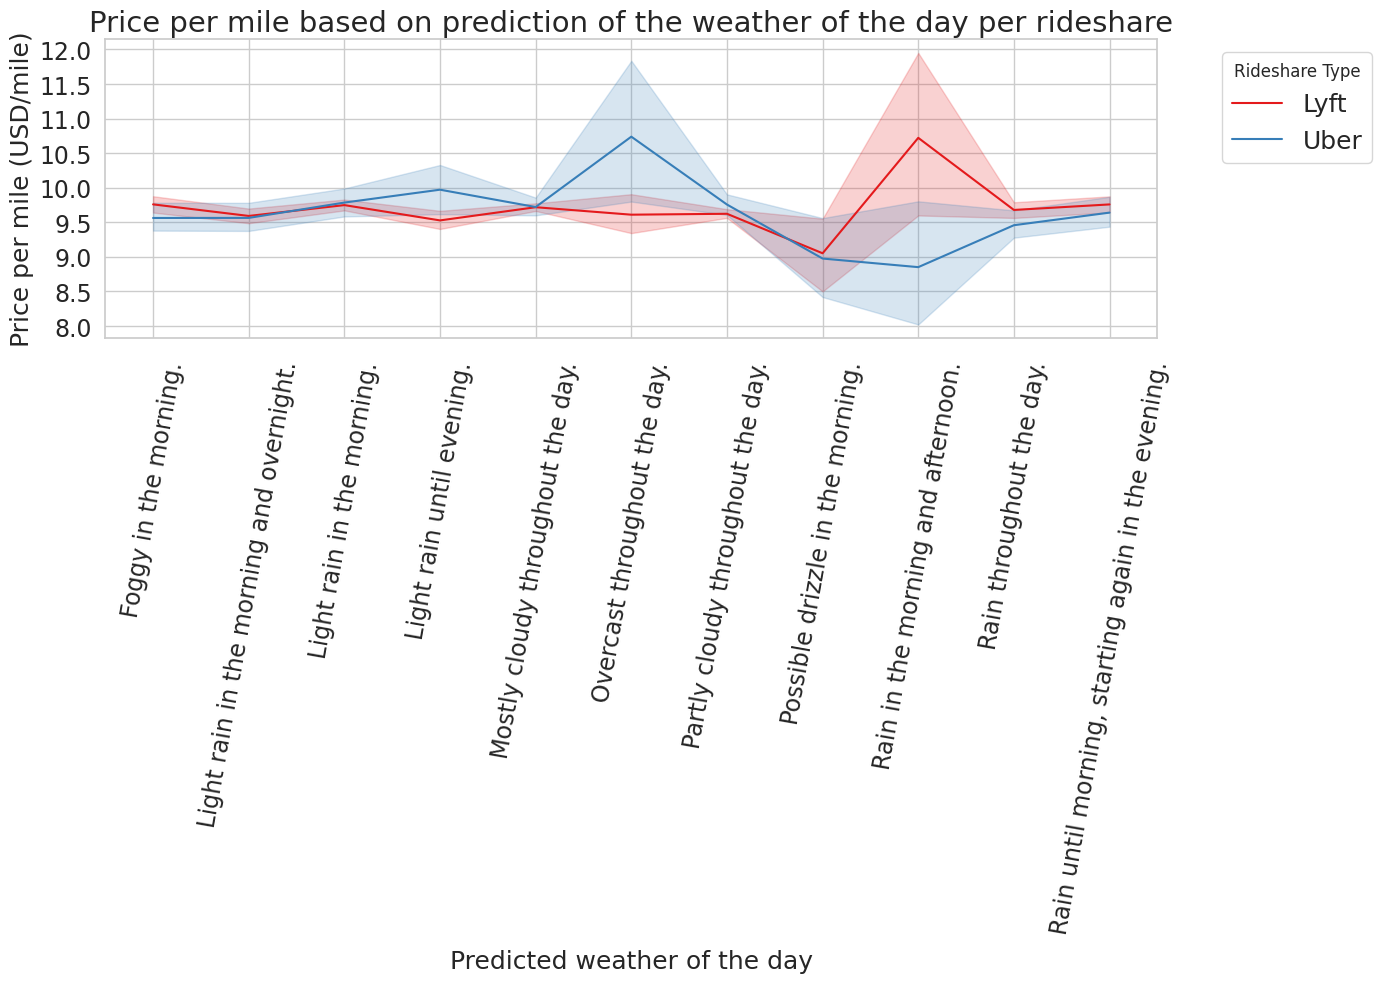

In [49]:
## Comparison of price per mile based on prediction of the weather of the day per rideshare


# Define plot style
sns.set(style="whitegrid")

# Create line plot with hue
plt.figure(figsize=(14, 10))
line_plot = sns.lineplot(data=processed_rideshare_data, x='long_summary', y='price_per_mile', hue='cab_type', palette='Set1')

# Rotate x-axis labels
line_plot.set_xticklabels(line_plot.get_xticklabels(), rotation=80)

# Set labels and title
plt.xlabel('Predicted weather of the day', fontsize=18)
plt.ylabel('Price per mile (USD/mile)', fontsize=18)
plt.title('Price per mile based on prediction of the weather of the day per rideshare', fontsize=21)

# Increase fontsize of ticks
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Show plot
plt.legend(title='Rideshare Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18)
plt.tight_layout()
plt.show()

<ipython-input-50-dd2a13201a6e>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  line_plot.set_xticklabels(line_plot.get_xticklabels(), rotation=80, fontsize=18)


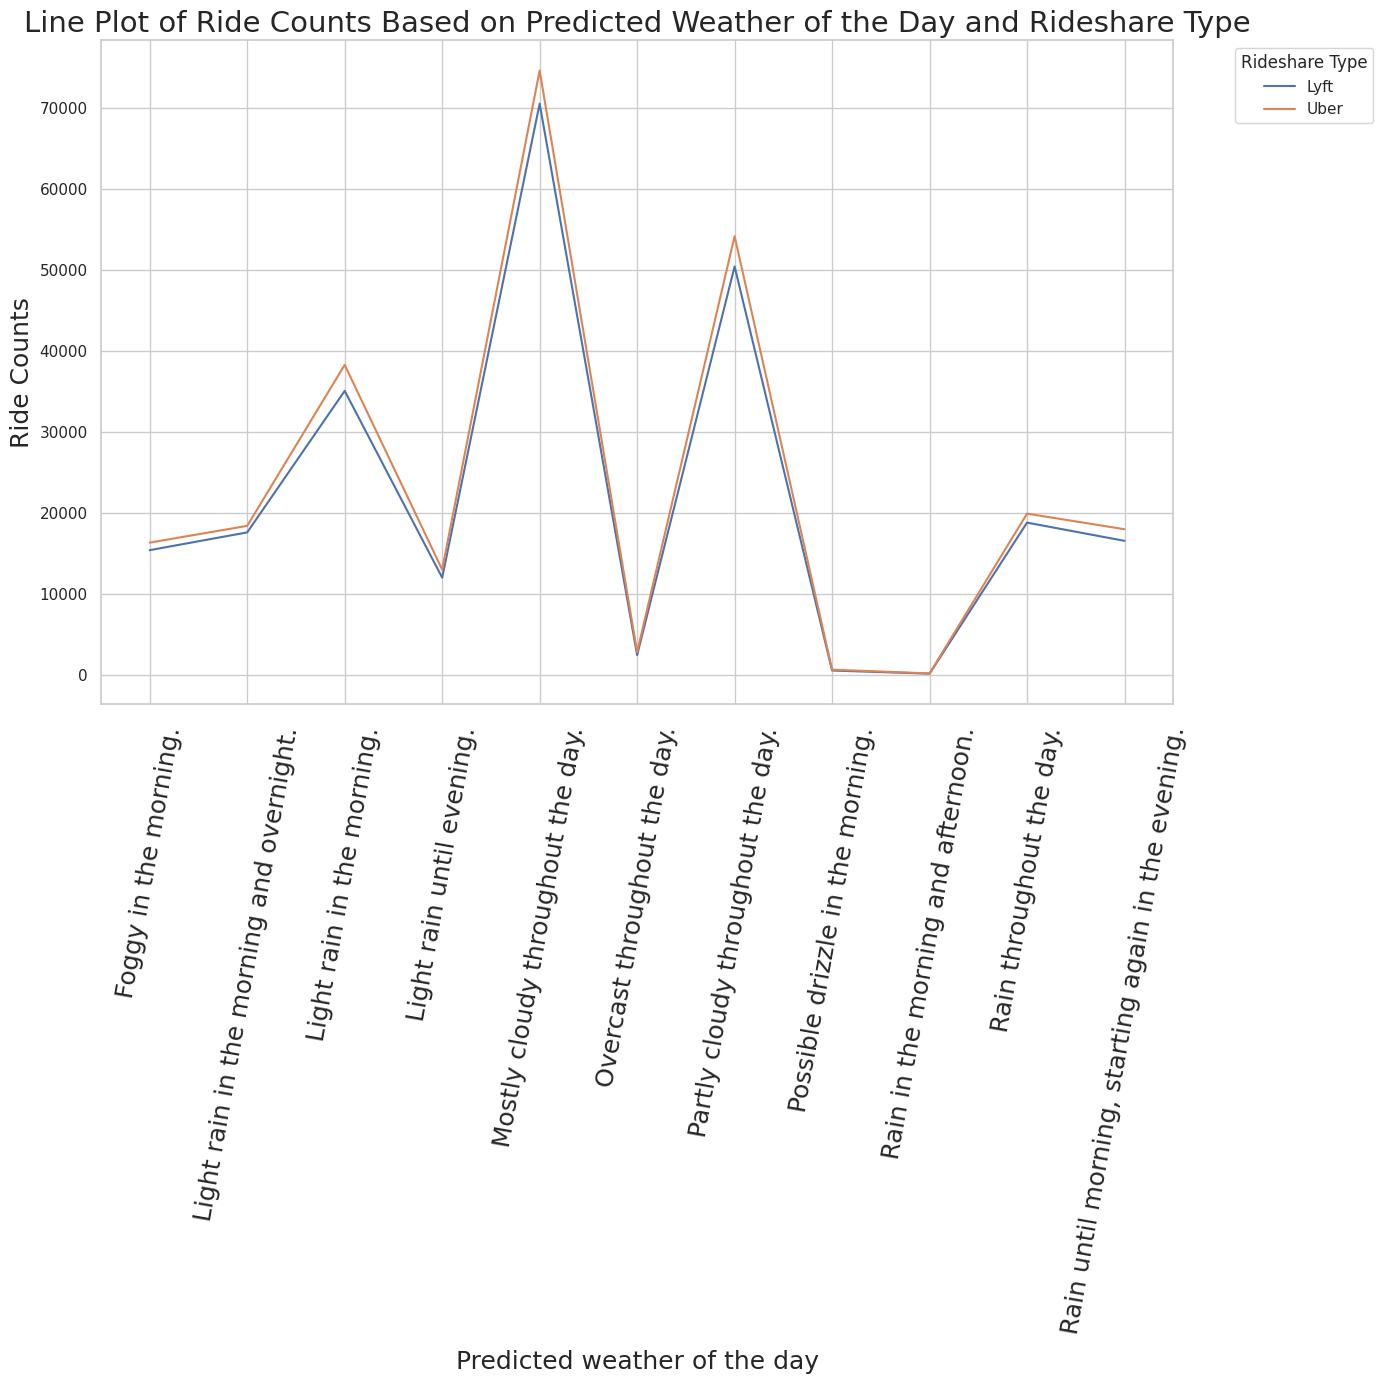

In [50]:
## Comparison of Ride Counts based on short description of the weather in the hour per rideshare


df = processed_rideshare_data.groupby('cab_type')['long_summary'].value_counts().reset_index(name='count')

df.head()

# Define plot style
sns.set(style="whitegrid")

# Create line plot
plt.figure(figsize=(14, 14))
line_plot = sns.lineplot(data=df, x='long_summary', y='count', hue='cab_type')

# Set labels and title
plt.xlabel('Predicted weather of the day', fontsize=18)
plt.ylabel('Ride Counts', fontsize=18)
plt.title('Line Plot of Ride Counts Based on Predicted Weather of the Day and Rideshare Type', fontsize=21)

# Rotate x-axis labels
line_plot.set_xticklabels(line_plot.get_xticklabels(), rotation=80, fontsize=18)


# Show plot
plt.legend(title='Rideshare Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [51]:
# Extract the day names from the datetime column

# Convert timestamp column to datetime objects
processed_rideshare_data['datetime'] = pd.to_datetime(processed_rideshare_data['timestamp'], unit='s')

# Extract weekday from datetime objects
processed_rideshare_data['day'] = processed_rideshare_data['datetime'].dt.day_name()

processed_rideshare_data.head()

timestamp  hour        day  month            datetime            source  \
0  1.544953e+09     9     Sunday     12 2018-12-16 09:30:08  Haymarket Square   
1  1.543284e+09     2    Tuesday     11 2018-11-27 02:00:24  Haymarket Square   
2  1.543367e+09     1  Wednesday     11 2018-11-28 01:00:22  Haymarket Square   
3  1.543554e+09     4     Friday     11 2018-11-30 04:53:03  Haymarket Square   
4  1.543463e+09     3   Thursday     11 2018-11-29 03:49:20  Haymarket Square   

     destination cab_type          name  price  ...   uvIndexTime  \
0  North Station     Lyft        Shared    5.0  ...  1.544980e+09   
1  North Station     Lyft           Lux   11.0  ...  1.543252e+09   
2  North Station     Lyft          Lyft    7.0  ...  1.543338e+09   
3  North Station     Lyft  Lux Black XL   26.0  ...  1.543507e+09   
4  North Station     Lyft       Lyft XL    9.0  ...  1.543421e+09   

   temperatureMin  temperatureMinTime  temperatureMax  temperatureMaxTime  \
0           39.89        1.545012e+09           43.68        1.544969e+09   
1           40.49        1.543234e+09           47.30        1.543252e+09   
2           35.36        1.543378e+09           47.55        1.543320e+09   
3           34.67        1.543550e+09           45.03        1.543511e+09   
4           33.10        1.543403e+09           42.18        1.543421e+09   

   apparentTemperatureMin apparentTemperatureMinTime  apparentTemperatureMax  \
0                   33.73               1.545012e+09                   38.07   
1                   36.20               1.543291e+09                   43.92   
2                   31.04               1.543378e+09                   44.12   
3                   30.30               1.543550e+09                   38.53   
4                   29.11               1.543392e+09                   35.75   

   apparentTemperatureMaxTime  price_per_mile  
0                1.544958e+09       11.363636  
1                1.543252e+09       25.000000  
2                1.543320e+09       15.909091  
3                1.543511e+09       59.090909  
4                1.543421e+09       20.454545  

[5 rows x 54 columns]

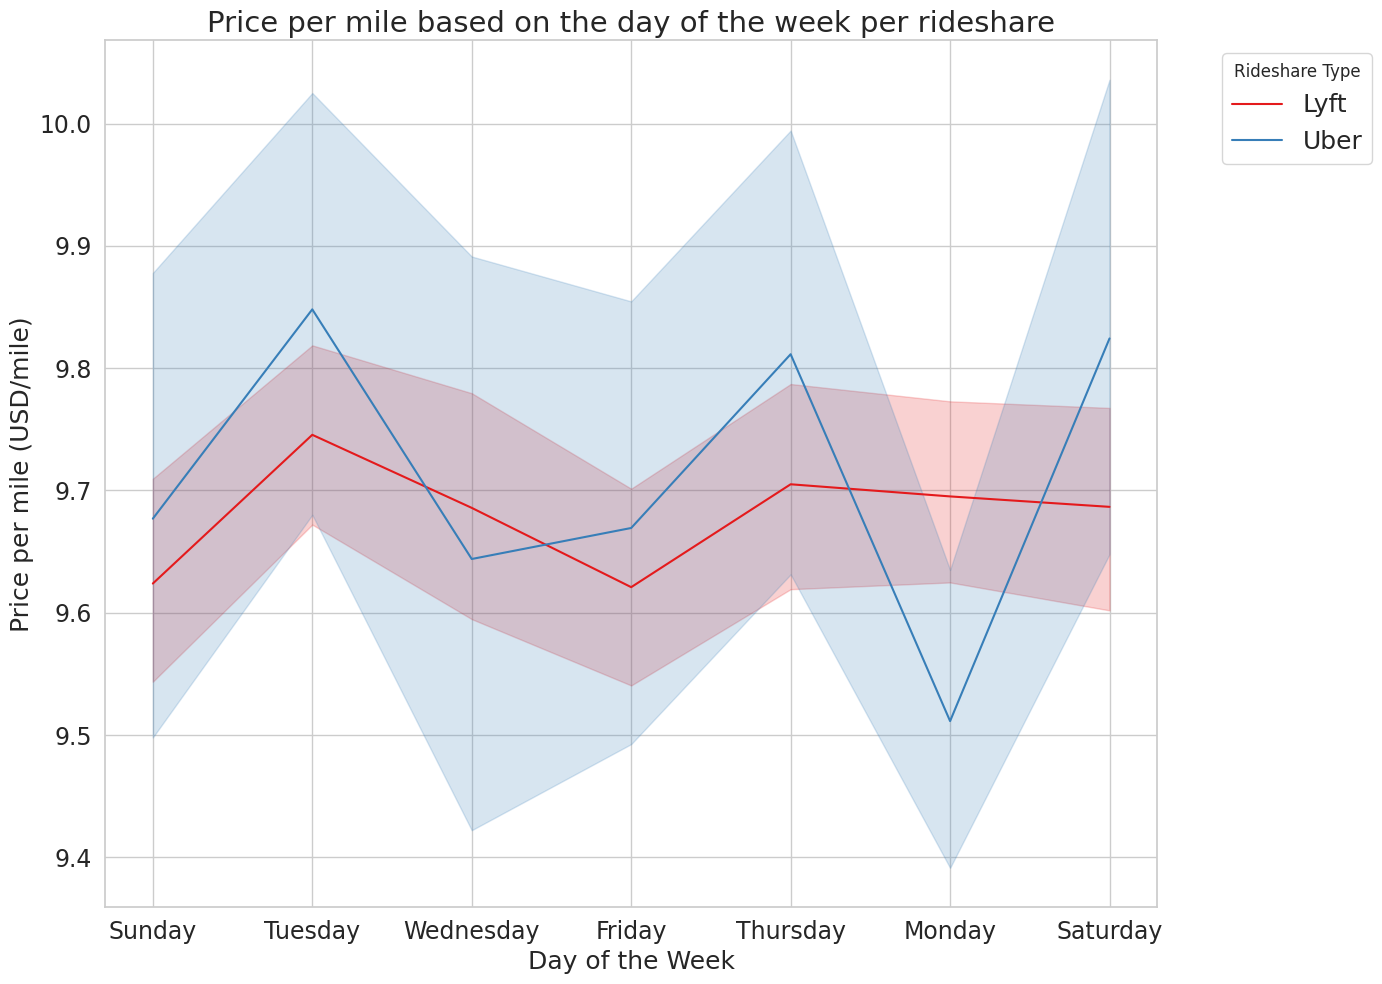

In [52]:
## Comparison of price per mile based on day of the week per rideshare

# Define plot style
sns.set(style="whitegrid")

# Create line plot with hue
plt.figure(figsize=(14, 10))
sns.lineplot(data=processed_rideshare_data, x='day', y='price_per_mile', hue='cab_type', palette='Set1')

# Set labels and title
plt.xlabel('Day of the Week', fontsize=18)
plt.ylabel('Price per mile (USD/mile)', fontsize=18)
plt.title('Price per mile based on the day of the week per rideshare', fontsize=21)

# Increase fontsize of ticks
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Show plot
plt.legend(title='Rideshare Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18)
plt.tight_layout()
plt.show()

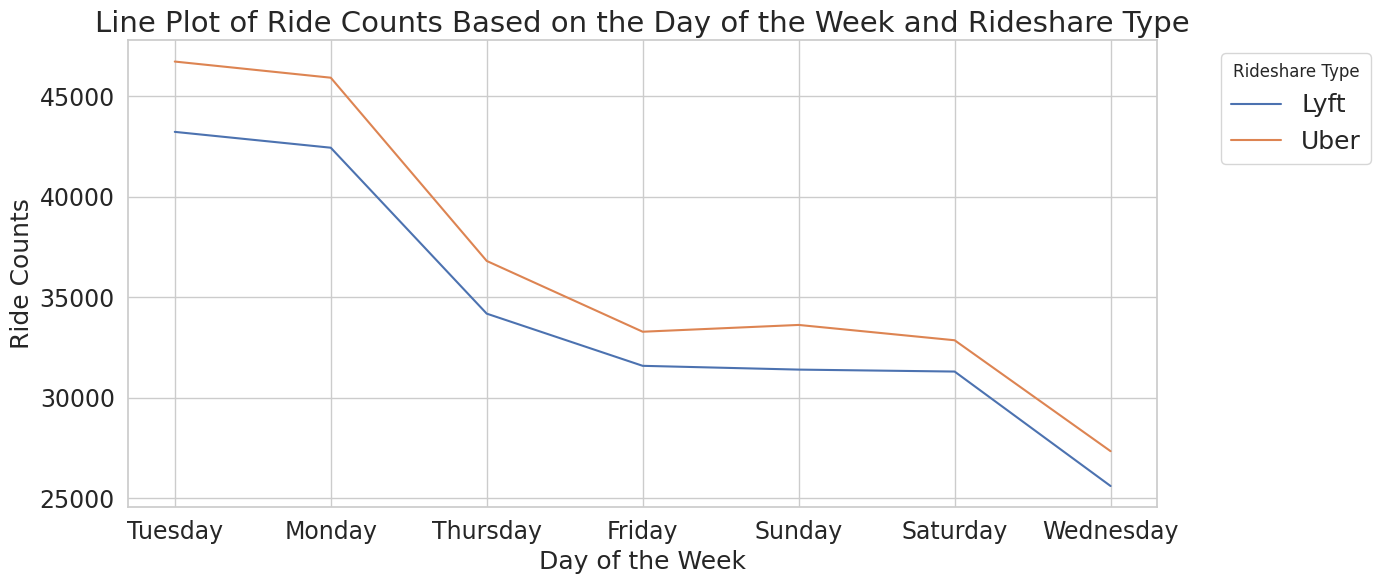

In [53]:
## Comparison of Ride Counts based on short description of the weather in the hour per rideshare


df = processed_rideshare_data.groupby('cab_type')['day'].value_counts().reset_index(name='count')

df.head()

# Define plot style
sns.set(style="whitegrid")

# Create line plot
plt.figure(figsize=(14, 6))
line_plot = sns.lineplot(data=df, x='day', y='count', hue='cab_type')

# Set labels and title
plt.xlabel('Day of the Week', fontsize=18)
plt.ylabel('Ride Counts', fontsize=18)
plt.title('Line Plot of Ride Counts Based on the Day of the Week and Rideshare Type', fontsize=21)

# Increase fontsize of ticks
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)


# Show plot
plt.legend(title='Rideshare Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18)
plt.tight_layout()
plt.show()

In [54]:
processed_rideshare_data.dtypes

timestamp                             float64
hour                                    int64
day                                    object
month                                   int64
datetime                       datetime64[ns]
source                               category
destination                          category
cab_type                             category
name                                 category
price                                 float64
distance                              float64
surge_multiplier                      float64
latitude                              float64
longitude                             float64
temperature                           float64
apparentTemperature                   float64
long_summary                         category
precipIntensity                       float64
precipProbability                     float64
humidity                              float64
windSpeed                             float64
windGust                          

In [55]:
processed_rideshare_data['day'] = processed_rideshare_data['day'].astype('category')
processed_rideshare_data.drop(columns='price_per_mile', inplace=True)
processed_rideshare_data.drop(columns='visibility.1', inplace=True)

processed1_rideshare_data = processed_rideshare_data.select_dtypes(exclude=['category'])

# Calculate correlations between the target column and all other columns
correlations = processed1_rideshare_data.corr()['price'].abs()

# Get the top 10 correlated features (excluding the target column itself)
top_correlated_features = correlations.nlargest(16)[1:]

# Print the top 15 correlated features
print("Top 15 correlated features with the price of rides:")
print(top_correlated_features)

Top 15 correlated features with the price of rides:
distance                   0.345793
surge_multiplier           0.238944
visibility                 0.002732
latitude                   0.002310
humidity                   0.002192
temperatureHigh            0.002108
apparentTemperatureMin     0.002061
temperatureMax             0.002032
longitude                  0.002004
temperatureMin             0.001898
cloudCover                 0.001822
apparentTemperatureHigh    0.001776
dewPoint                   0.001684
apparentTemperatureMax     0.001675
moonPhase                  0.001639
Name: price, dtype: float64


In [56]:
correlated_features = top_correlated_features.index.tolist()
print(correlated_features)

['distance', 'surge_multiplier', 'visibility', 'latitude', 'humidity', 'temperatureHigh', 'apparentTemperatureMin', 'temperatureMax', 'longitude', 'temperatureMin', 'cloudCover', 'apparentTemperatureHigh', 'dewPoint', 'apparentTemperatureMax', 'moonPhase']


In [57]:
correlated_features += ['price']

In [58]:
print(correlated_features)

['distance', 'surge_multiplier', 'visibility', 'latitude', 'humidity', 'temperatureHigh', 'apparentTemperatureMin', 'temperatureMax', 'longitude', 'temperatureMin', 'cloudCover', 'apparentTemperatureHigh', 'dewPoint', 'apparentTemperatureMax', 'moonPhase', 'price']


In [59]:
processed_rideshare_data.shape

(496267, 52)

In [60]:
processed_rideshare_data.head(5)

timestamp  hour        day  month            datetime            source  \
0  1.544953e+09     9     Sunday     12 2018-12-16 09:30:08  Haymarket Square   
1  1.543284e+09     2    Tuesday     11 2018-11-27 02:00:24  Haymarket Square   
2  1.543367e+09     1  Wednesday     11 2018-11-28 01:00:22  Haymarket Square   
3  1.543554e+09     4     Friday     11 2018-11-30 04:53:03  Haymarket Square   
4  1.543463e+09     3   Thursday     11 2018-11-29 03:49:20  Haymarket Square   

     destination cab_type          name  price  ...  precipIntensityMax  \
0  North Station     Lyft        Shared    5.0  ...              0.1276   
1  North Station     Lyft           Lux   11.0  ...              0.1300   
2  North Station     Lyft          Lyft    7.0  ...              0.1064   
3  North Station     Lyft  Lux Black XL   26.0  ...              0.0000   
4  North Station     Lyft       Lyft XL    9.0  ...              0.0001   

    uvIndexTime  temperatureMin  temperatureMinTime  temperatureMax  \
0  1.544980e+09           39.89        1.545012e+09           43.68   
1  1.543252e+09           40.49        1.543234e+09           47.30   
2  1.543338e+09           35.36        1.543378e+09           47.55   
3  1.543507e+09           34.67        1.543550e+09           45.03   
4  1.543421e+09           33.10        1.543403e+09           42.18   

   temperatureMaxTime apparentTemperatureMin  apparentTemperatureMinTime  \
0        1.544969e+09                  33.73                1.545012e+09   
1        1.543252e+09                  36.20                1.543291e+09   
2        1.543320e+09                  31.04                1.543378e+09   
3        1.543511e+09                  30.30                1.543550e+09   
4        1.543421e+09                  29.11                1.543392e+09   

   apparentTemperatureMax  apparentTemperatureMaxTime  
0                   38.07                1.544958e+09  
1                   43.92                1.543252e+09  
2                   44.12                1.543320e+09  
3                   38.53                1.543511e+09  
4                   35.75                1.543421e+09  

[5 rows x 52 columns]

In [61]:
# One-hot encoding of categorical variables employed to proccess for machine learning instead of labelenoding
# to not introduce unintented ordinal information

"""processed_rideshare_data['day'] = processed_rideshare_data['day'].astype('category')
category_columns = processed_rideshare_data.select_dtypes(include=['category'])
processed_rideshare_data = pd.get_dummies(processed_rideshare_data, columns=category_columns.columns, drop_first=True)

columns_to_drop = ['datetime']
processed_rideshare_data.drop(columns=columns_to_drop, inplace=True)
processed_rideshare_data.dtypes"""

"processed_rideshare_data['day'] = processed_rideshare_data['day'].astype('category')\ncategory_columns = processed_rideshare_data.select_dtypes(include=['category'])\nprocessed_rideshare_data = pd.get_dummies(processed_rideshare_data, columns=category_columns.columns, drop_first=True)\n\ncolumns_to_drop = ['datetime']\nprocessed_rideshare_data.drop(columns=columns_to_drop, inplace=True)\nprocessed_rideshare_data.dtypes"

In [62]:
# Finding the top 15 correlated features to the price target variable

# Calculate correlations between the target column and all other columns
correlations = processed_rideshare_data.select_dtypes(exclude=['category']).corr()['price'].abs()

# Get the top 10 correlated features (excluding the target column itself)
top_correlated_features1 = correlations.nlargest(16)[1:]

# Print the top 15 correlated features
print("Top 15 correlated features with the price of rides:")
print(top_correlated_features)

Top 15 correlated features with the price of rides:
distance                   0.345793
surge_multiplier           0.238944
visibility                 0.002732
latitude                   0.002310
humidity                   0.002192
temperatureHigh            0.002108
apparentTemperatureMin     0.002061
temperatureMax             0.002032
longitude                  0.002004
temperatureMin             0.001898
cloudCover                 0.001822
apparentTemperatureHigh    0.001776
dewPoint                   0.001684
apparentTemperatureMax     0.001675
moonPhase                  0.001639
Name: price, dtype: float64


In [63]:
correlated_features = top_correlated_features.index.tolist()
correlated_features += ['price']
print(correlated_features)

['distance', 'surge_multiplier', 'visibility', 'latitude', 'humidity', 'temperatureHigh', 'apparentTemperatureMin', 'temperatureMax', 'longitude', 'temperatureMin', 'cloudCover', 'apparentTemperatureHigh', 'dewPoint', 'apparentTemperatureMax', 'moonPhase', 'price']


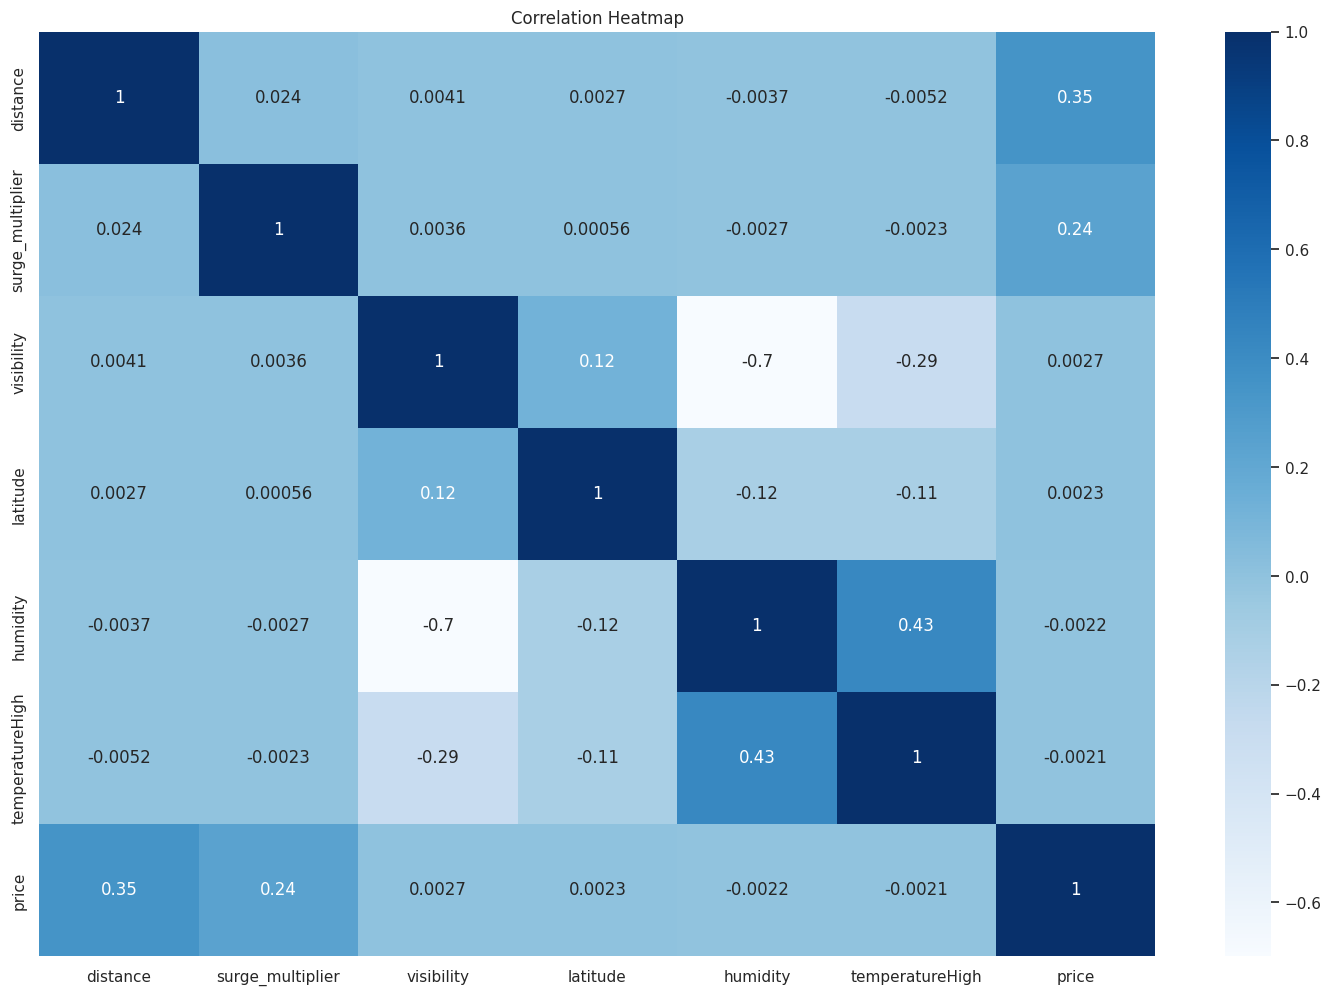

In [64]:
# Examining the correlation heatmap of features with outliers
# Assuming correlated_features is a list containing the correlated feature names
subset_correlated_features = correlated_features[:6] + [correlated_features[-1]]
correlation_rideshare_data = processed_rideshare_data[subset_correlated_features]
corr_matrix = correlation_rideshare_data.corr()
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot = True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [65]:
# Splitting the datasets to uber and lyft rides respectively
uber_rideshare_data = processed_rideshare_data[rideshare_data['cab_type']=='Uber'];
lyft_rideshare_data = processed_rideshare_data[rideshare_data['cab_type']=='Lyft'];

<ipython-input-65-74953e59ab6f>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  uber_rideshare_data = processed_rideshare_data[rideshare_data['cab_type']=='Uber'];
<ipython-input-65-74953e59ab6f>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lyft_rideshare_data = processed_rideshare_data[rideshare_data['cab_type']=='Lyft'];


In [66]:
uber_rideshare_data.shape

(256539, 52)

In [67]:
# Finding the top 6 correlated features for Uber to the price target variable

# Calculate correlations between the target column and all other columns
correlations = uber_rideshare_data.select_dtypes(exclude=['category']).corr()['price'].abs()

# Get the top 10 correlated features (excluding the target column itself)
top_correlated_features2 = correlations.nlargest(7)[1:]

# Print the top 15 correlated features
print("Top 6 correlated features with the price of rides:")
print(top_correlated_features2)

Top 6 correlated features with the price of rides:
distance      0.337206
windGust      0.006074
windSpeed     0.005393
ozone         0.003511
cloudCover    0.003144
pressure      0.002681
Name: price, dtype: float64


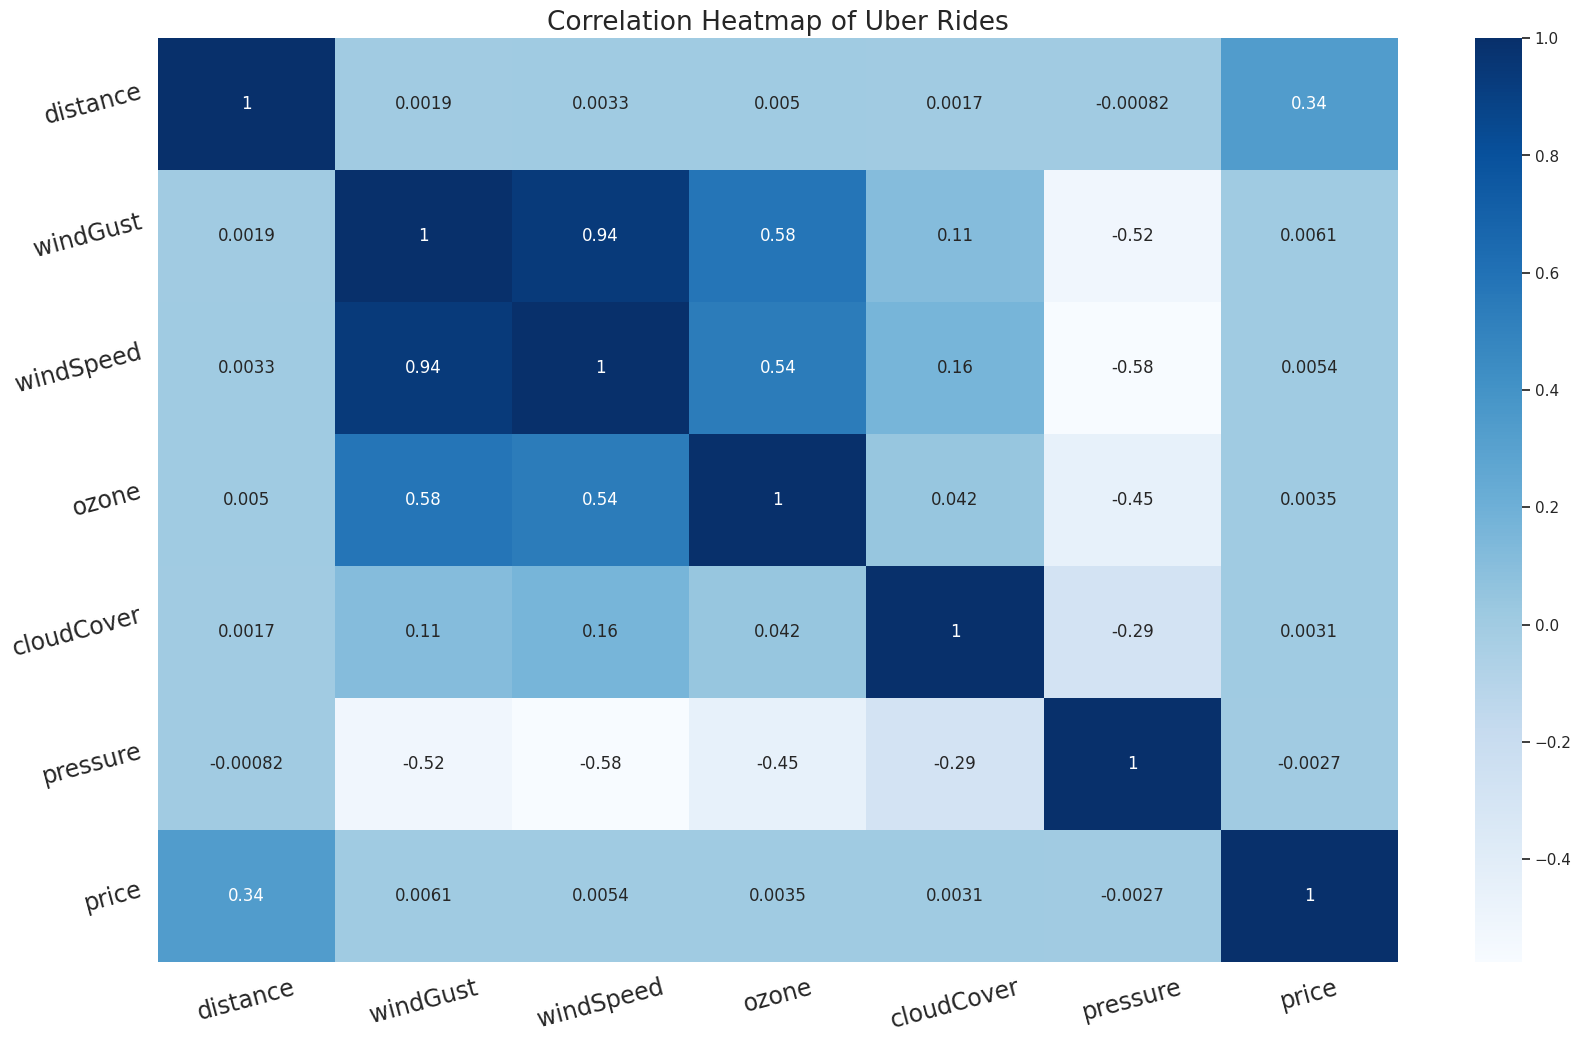

In [68]:
# Examining the correlation heatmap of features with outliers
# Assuming correlated_features is a list containing the correlated feature names
correlated_features = top_correlated_features2.index.tolist()
correlated_features += ['price']
correlation_rideshare_data = uber_rideshare_data[correlated_features]
corr_matrix = correlation_rideshare_data.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot = True, cmap='Blues')
plt.title('Correlation Heatmap of Uber Rides', fontsize=19)
# Increase fontsize of ticks
plt.xticks(fontsize=17, rotation=15)
plt.yticks(fontsize=17, rotation=15)

plt.show()

In [69]:
# Finding the top 6 correlated features for Lyft to the price target variable

# Calculate correlations between the target column and all other columns
correlations = lyft_rideshare_data.select_dtypes(exclude=['category']).corr()['price'].abs()

# Get the top 10 correlated features (excluding the target column itself)
top_correlated_features3 = correlations.nlargest(7)[1:]

# Print the top 15 correlated features
print("Top 6 correlated features with the price of rides:")
print(top_correlated_features3)

Top 6 correlated features with the price of rides:
distance            0.361689
surge_multiplier    0.305700
temperatureMin      0.004300
temperatureMax      0.003748
longitude           0.003654
visibility          0.003587
Name: price, dtype: float64


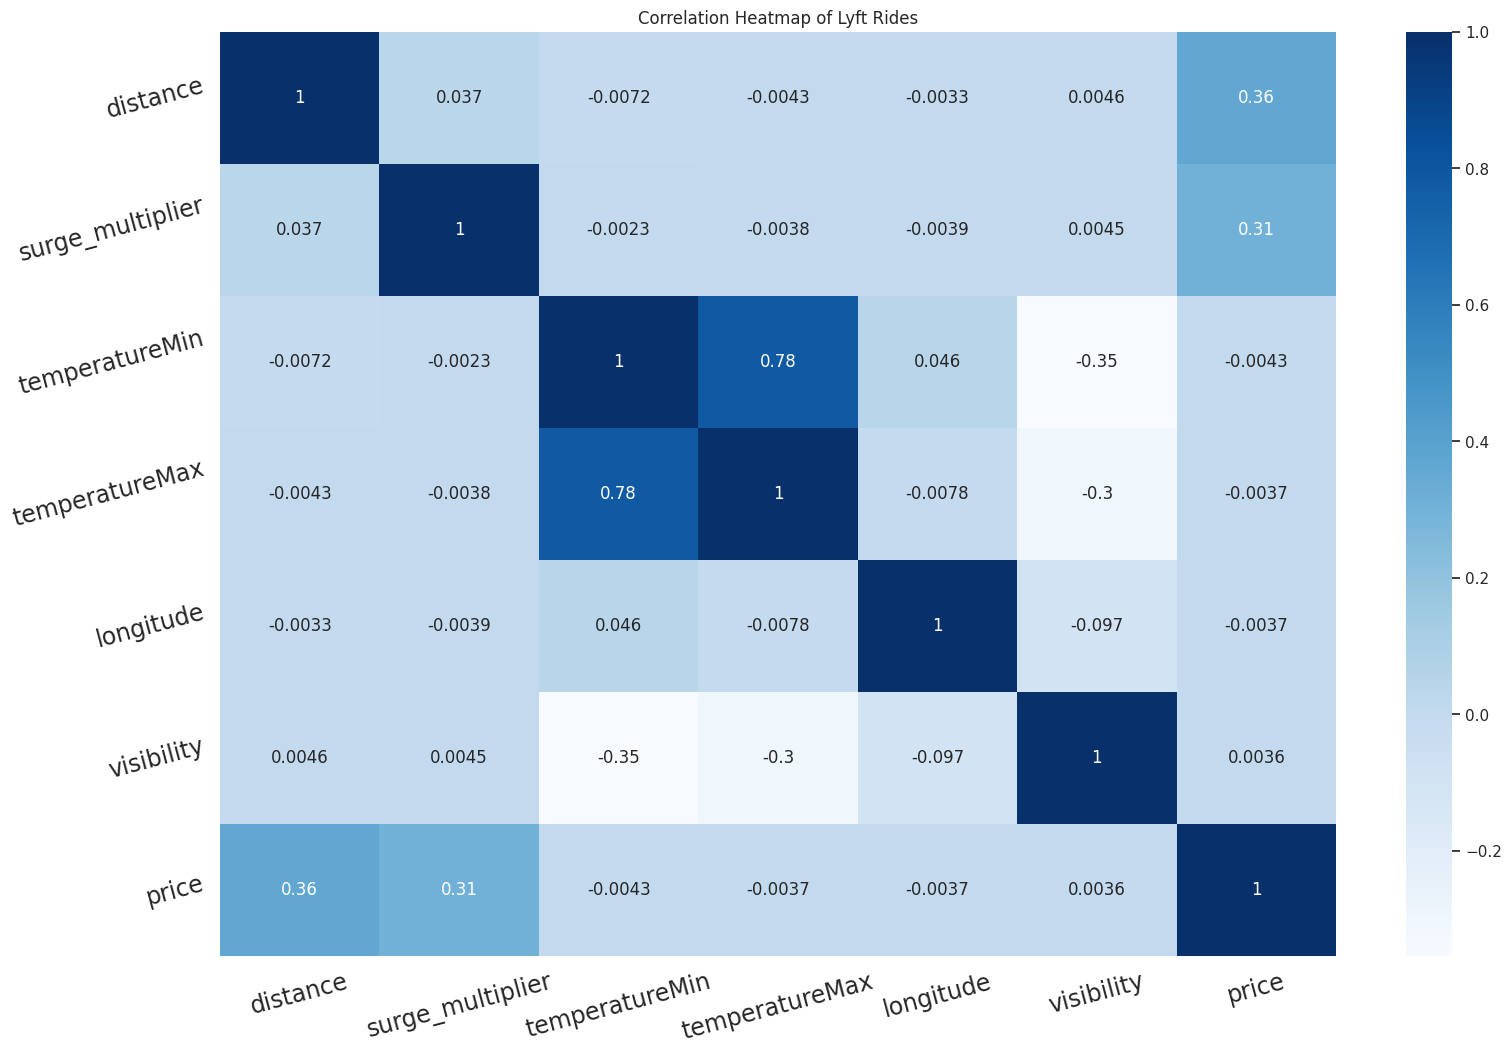

In [70]:
# Examining the correlation heatmap of features with outliers
# Assuming correlated_features is a list containing the correlated feature names
correlated_features = top_correlated_features3.index.tolist()
correlated_features += ['price']
correlation_rideshare_data = lyft_rideshare_data[correlated_features]
corr_matrix = correlation_rideshare_data.corr()
plt.figure(figsize=(18, 12))

sns.heatmap(corr_matrix, annot = True, cmap='Blues')
plt.title('Correlation Heatmap of Lyft Rides')
# Increase fontsize of ticks
plt.xticks(fontsize=17, rotation=15)
plt.yticks(fontsize=17, rotation=15)
plt.show()

# **Visualizations**

**Distribution of Ride Prices**

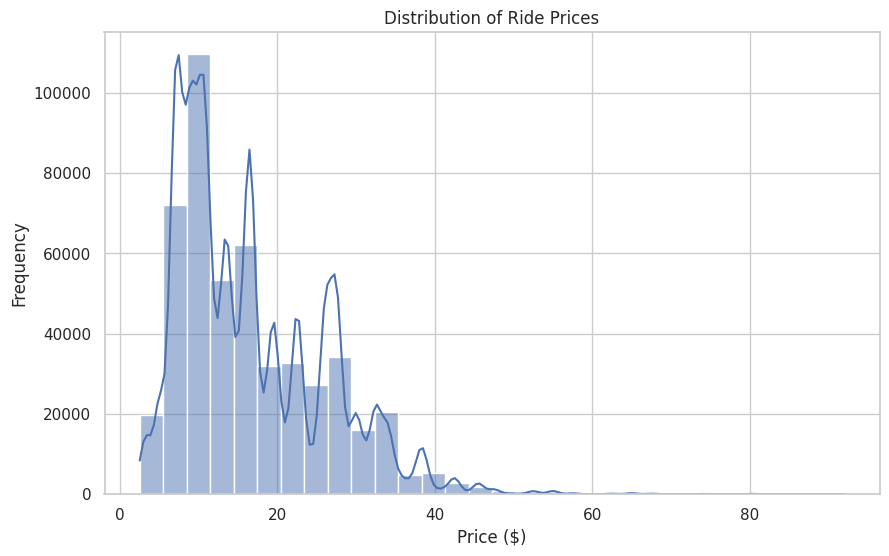

In [71]:
sns.set(style='whitegrid')
# Distribution of prices
plt.figure(figsize=(10, 6), facecolor='white')
sns.histplot(rideshare_data['price'], bins=30, kde=True)
plt.title('Distribution of Ride Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

This histogram shows the distribution of ride prices. Most rides are priced below $30, with a peak around $10-$15.

---



**Distribution of Ride Distances**

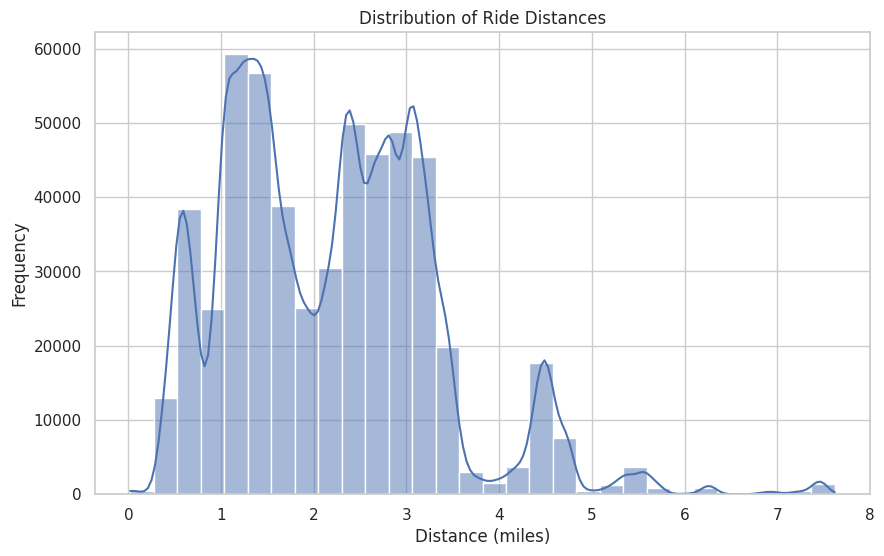

In [72]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6), facecolor='white')
sns.histplot(rideshare_data['distance'], bins=30, kde=True)
plt.title('Distribution of Ride Distances')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The histogram for ride distances indicates that most rides are short, typically less than 3 miles.

---



**Frequency of Rides by Hour:**

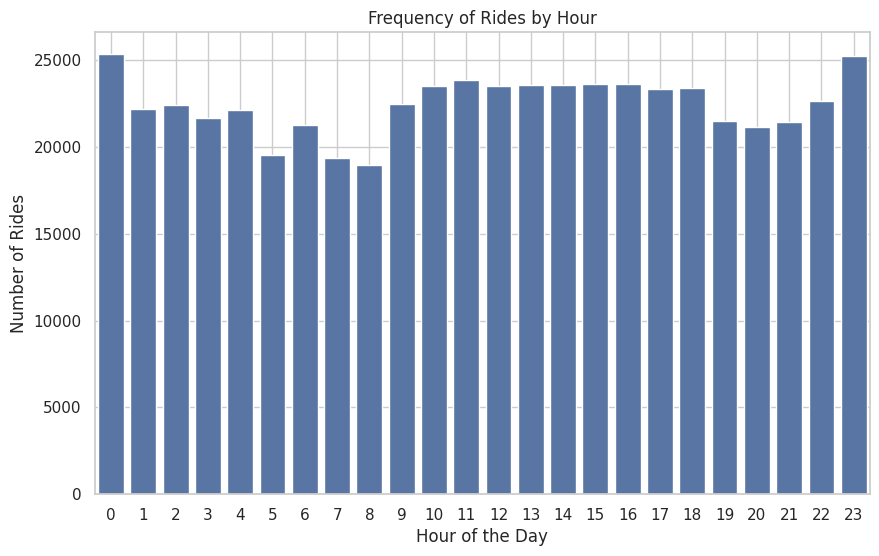

In [73]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6), facecolor='white')
sns.countplot(x='hour', data=rideshare_data)
plt.title('Frequency of Rides by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.grid(True)
plt.show()

This plot illustrates the number of rides throughout the day. There's a noticeable increase in rides during the morning and evening rush hours.

**Distribution of Surge Multipliers**

<ipython-input-74-bb2e53225839>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='surge_multiplier', data=rideshare_data, palette='viridis')


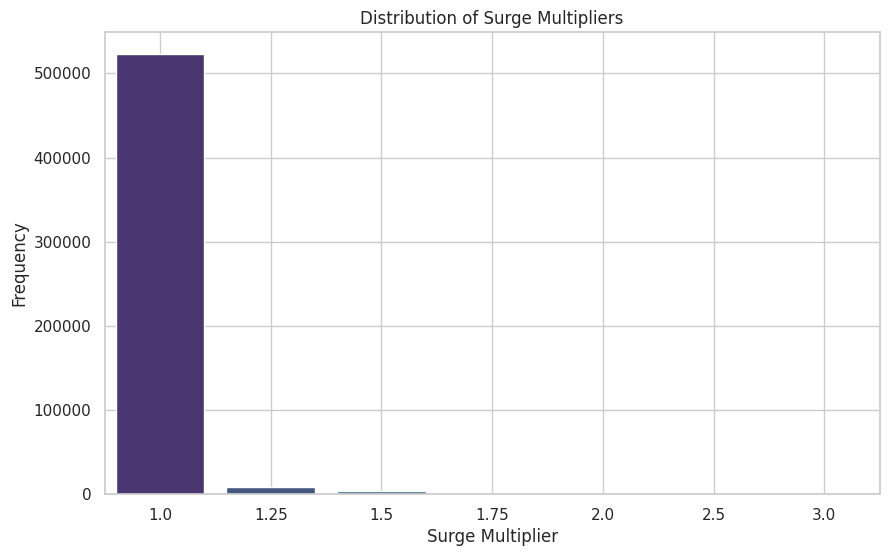

In [74]:
# Plotting the distribution of surge multipliers
plt.figure(figsize=(10, 6), facecolor='white')
sns.countplot(x='surge_multiplier', data=rideshare_data, palette='viridis')
plt.title('Distribution of Surge Multipliers')
plt.xlabel('Surge Multiplier')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

This chart shows the frequency of different surge multipliers applied to rides. Most rides do not have a surge multiplier, indicating normal pricing conditions most of the time.

**Relationship Between Temperature and Ride Price**

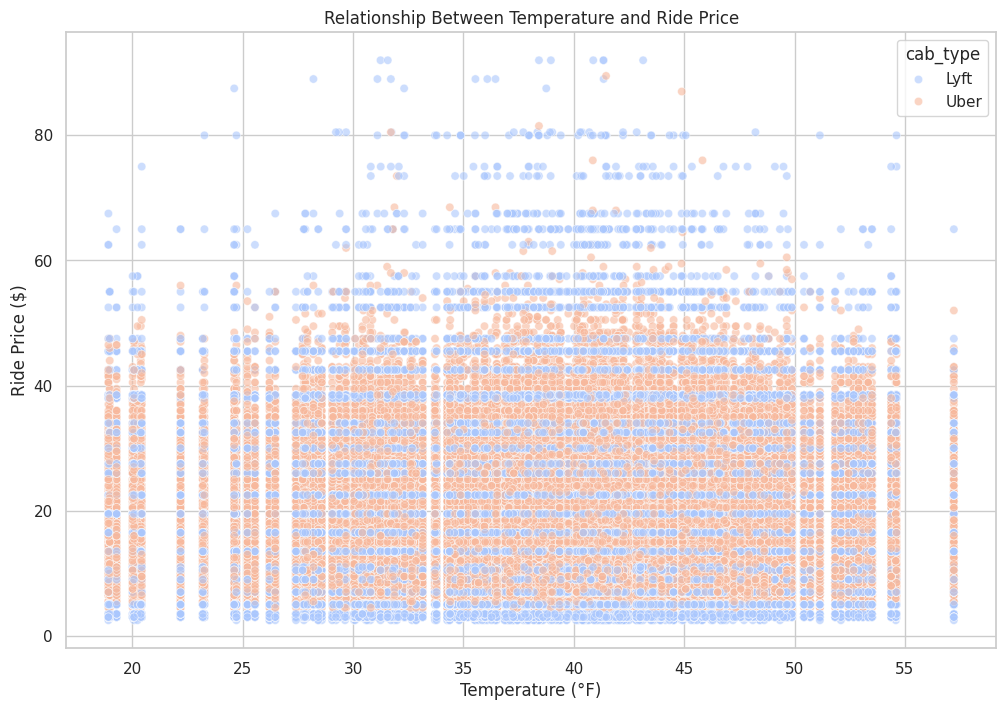

In [75]:
# Plotting the relationship between temperature and ride price
plt.figure(figsize=(12, 8), facecolor='white')
sns.scatterplot(x='temperature', y='price', data=rideshare_data, hue='cab_type', palette='coolwarm', alpha=0.6)
plt.title('Relationship Between Temperature and Ride Price')
plt.xlabel('Temperature (°F)')
plt.ylabel('Ride Price ($)')
plt.grid(True)
plt.show()

This scatter plot explores how ride prices vary with temperature, differentiated by cab type (Uber and Lyft). It appears that there isn't a strong direct correlation between temperature and price, but there are clusters of higher prices at moderate temperatures.

In [76]:
lyft_rideshare_data.columns

Index(['timestamp', 'hour', 'day', 'month', 'datetime', 'source',
       'destination', 'cab_type', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'long_summary', 'precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'windGust',
       'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime',
       'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure',
       'windBearing', 'cloudCover', 'uvIndex', 'ozone', 'sunriseTime',
       'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime',
       'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime'],
      dtype='object')

In [77]:
uber_rideshare_data.columns

Index(['timestamp', 'hour', 'day', 'month', 'datetime', 'source',
       'destination', 'cab_type', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'long_summary', 'precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'windGust',
       'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime',
       'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure',
       'windBearing', 'cloudCover', 'uvIndex', 'ozone', 'sunriseTime',
       'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime',
       'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime'],
      dtype='object')

In [78]:
processed_rideshare_data.columns

Index(['timestamp', 'hour', 'day', 'month', 'datetime', 'source',
       'destination', 'cab_type', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'long_summary', 'precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'windGust',
       'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime',
       'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure',
       'windBearing', 'cloudCover', 'uvIndex', 'ozone', 'sunriseTime',
       'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime',
       'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime'],
      dtype='object')

In [79]:
processed_rideshare_data.dtypes

timestamp                             float64
hour                                    int64
day                                  category
month                                   int64
datetime                       datetime64[ns]
source                               category
destination                          category
cab_type                             category
name                                 category
price                                 float64
distance                              float64
surge_multiplier                      float64
latitude                              float64
longitude                             float64
temperature                           float64
apparentTemperature                   float64
long_summary                         category
precipIntensity                       float64
precipProbability                     float64
humidity                              float64
windSpeed                             float64
windGust                          

In [80]:
rideshare_data_desired = processed_rideshare_data.copy()


In [81]:
corr1 = ['hour', 'month', 'windGustTime', 'temperatureHighTime',
          'temperatureLowTime', 'apparentTemperatureHighTime','price']
cor = processed_rideshare_data[corr1].corr()

<Axes: >

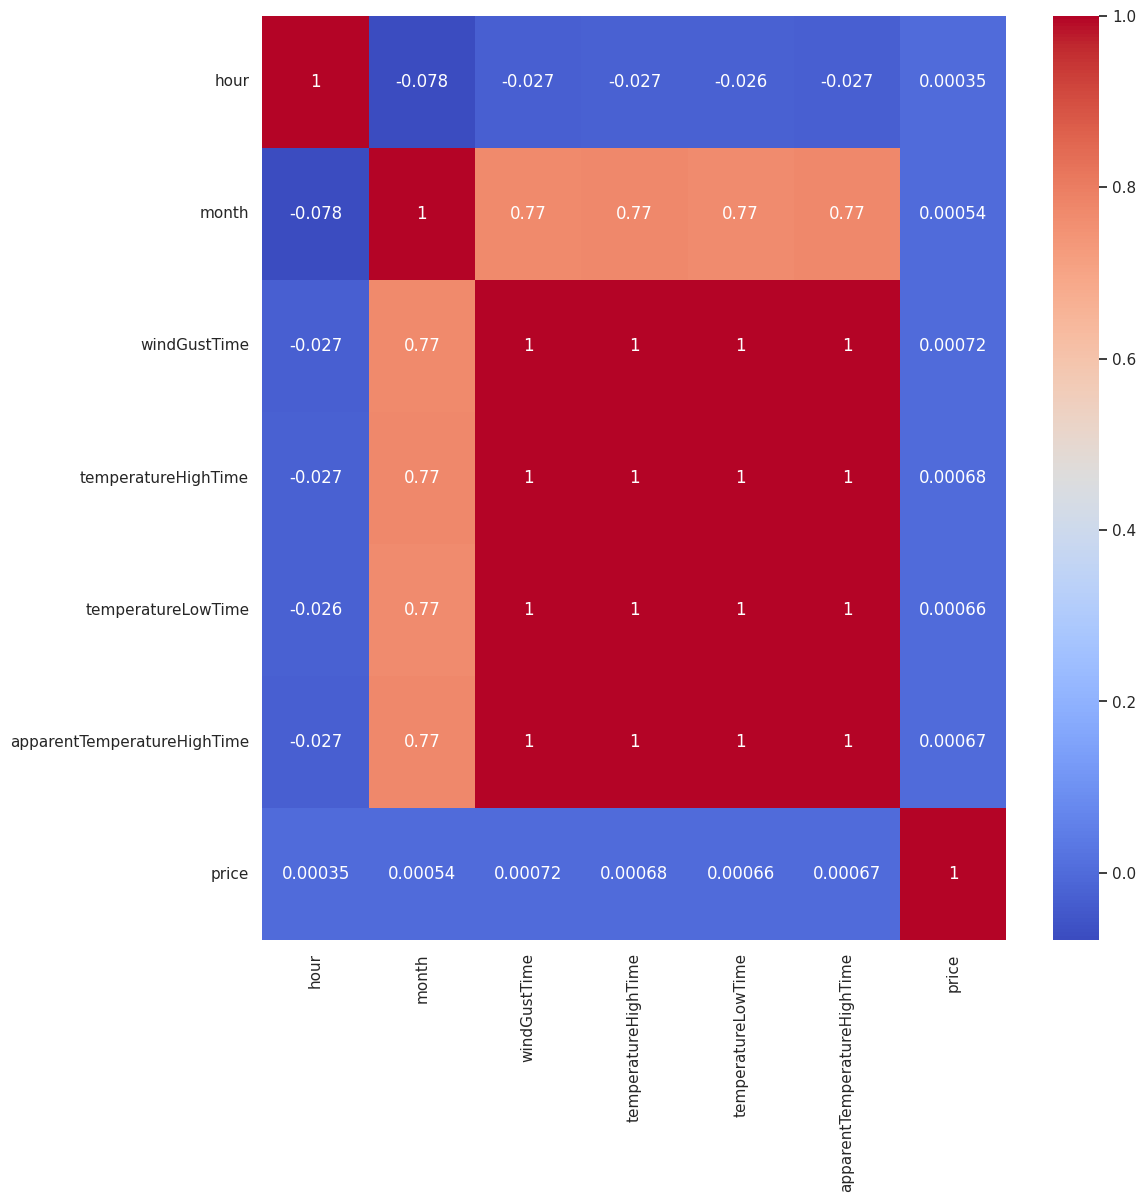

In [82]:
plt.figure(figsize=(12,12))
sns.heatmap(cor,annot=True,cmap='coolwarm')

In [83]:
#processed_rideshare_data.drop([ 'month', 'apparentTemperatureHighTime', 'temperatureHighTime','hour','windGustTime'],axis=1,inplace=True)

<Axes: >

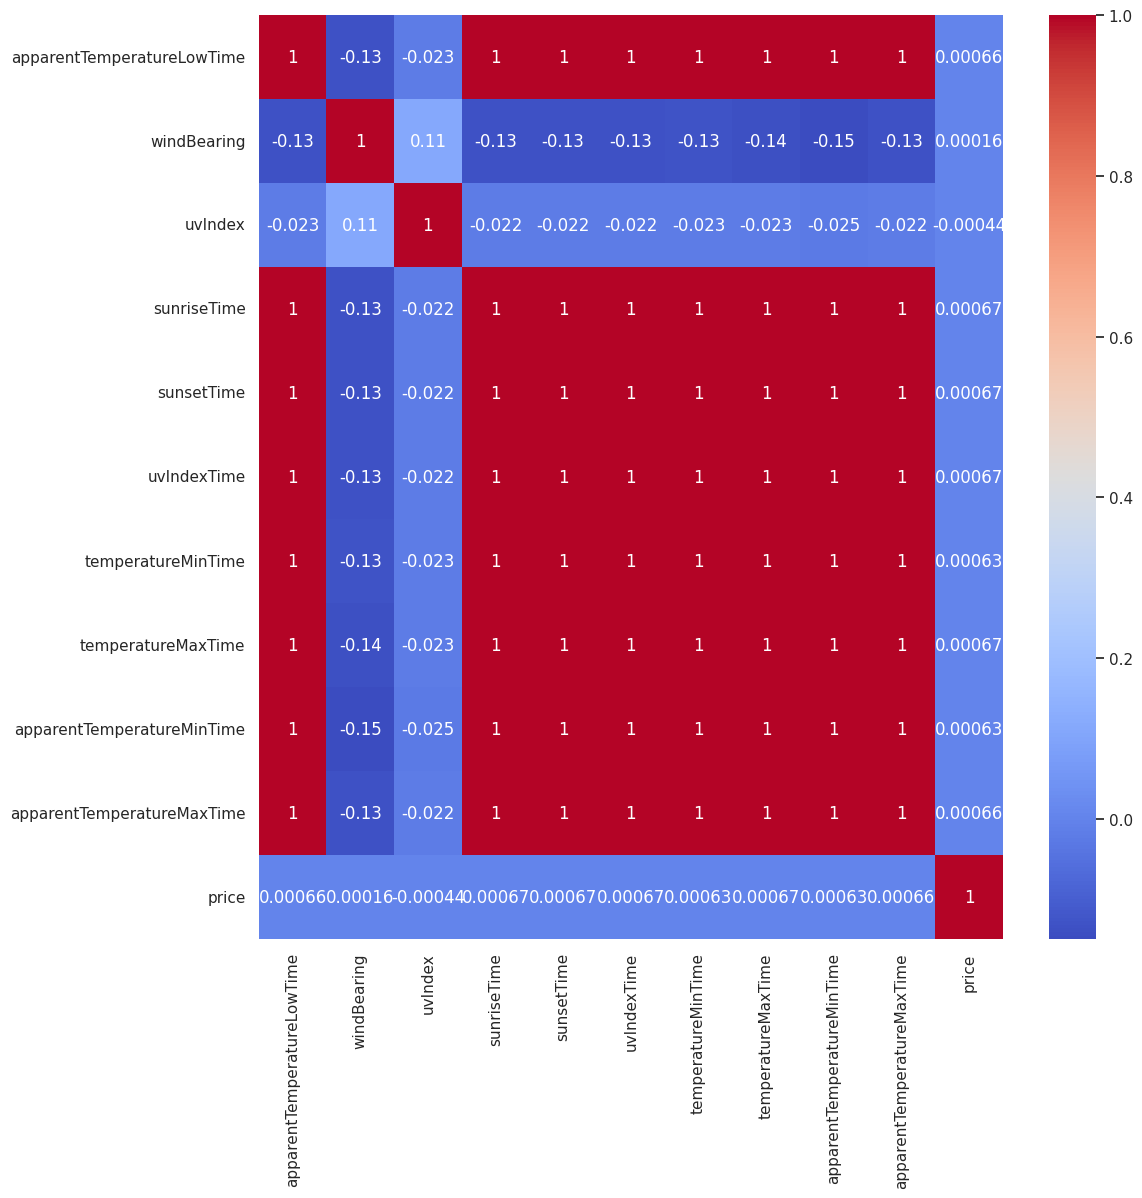

In [84]:
corr2 =['apparentTemperatureLowTime','windBearing','uvIndex','sunriseTime','sunsetTime','uvIndexTime',
         'temperatureMinTime','temperatureMaxTime','apparentTemperatureMinTime',
         'apparentTemperatureMaxTime', 'price']

cor = processed_rideshare_data[corr2].corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor,annot=True,cmap='coolwarm')

In [85]:
#processed_rideshare_data.drop(['uvIndex','windBearing','temperatureMaxTime','sunsetTime','sunriseTime' ,'uvIndexTime', 'apparentTemperatureMaxTime'],axis=1,inplace=True)

<Axes: >

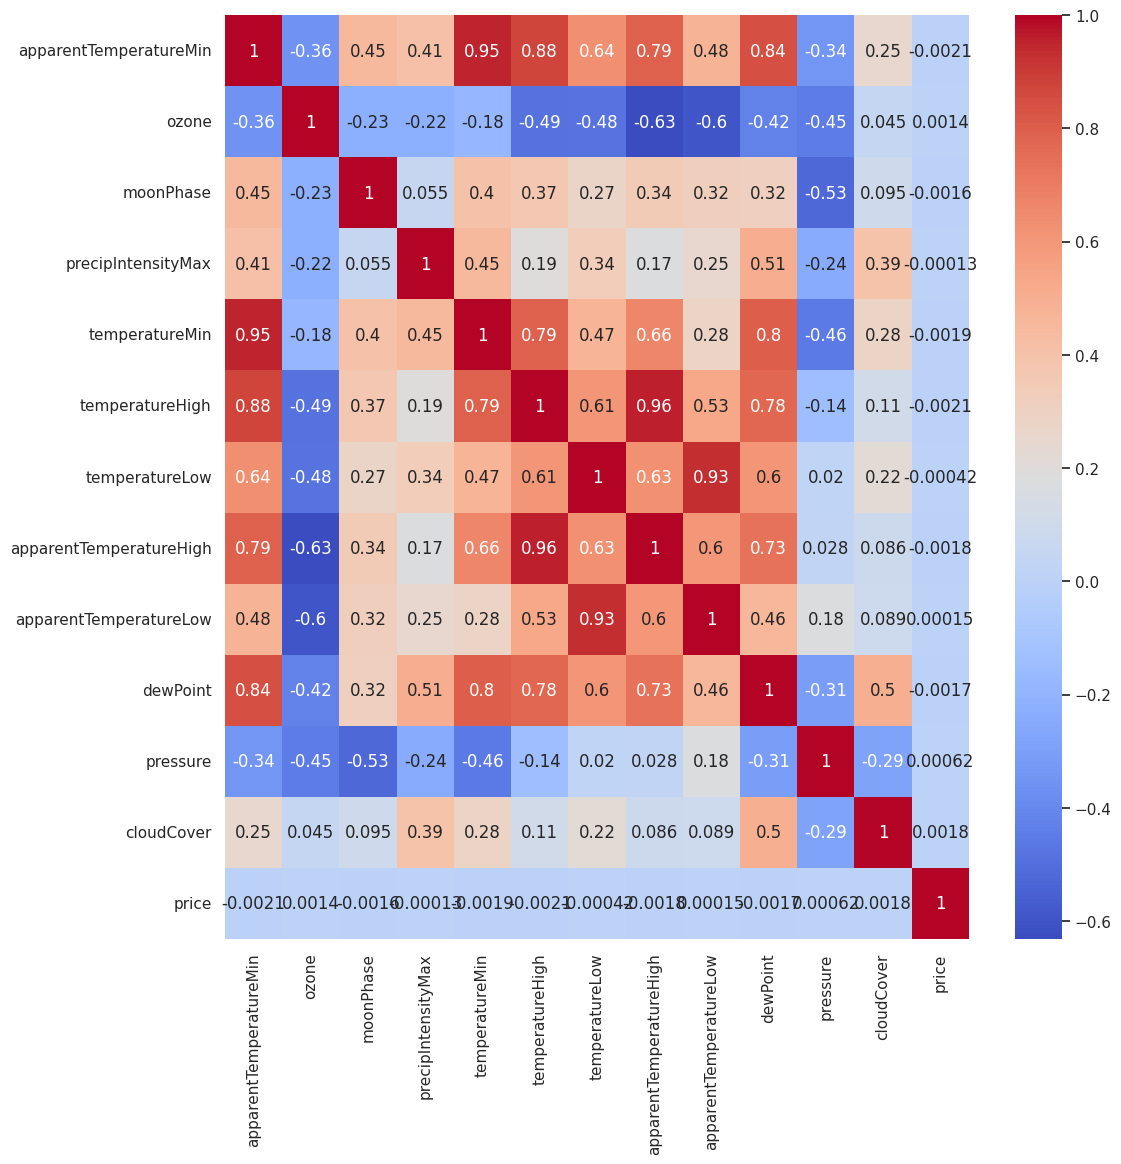

In [86]:
corr3 = ['apparentTemperatureMin','ozone',
 'moonPhase','precipIntensityMax','temperatureMin','temperatureHigh',
 'temperatureLow','apparentTemperatureHigh','apparentTemperatureLow',
          'dewPoint','pressure','cloudCover', 'price']
cor = processed_rideshare_data[corr3].corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor,annot=True,cmap='coolwarm')

In [87]:
#processed_rideshare_data.drop(['temperatureHigh','precipIntensityMax', 'apparentTemperatureMin','apparentTemperatureLow','apparentTemperatureHigh','dewPoint','temperatureMin'],axis=1,inplace=True)

<Axes: >

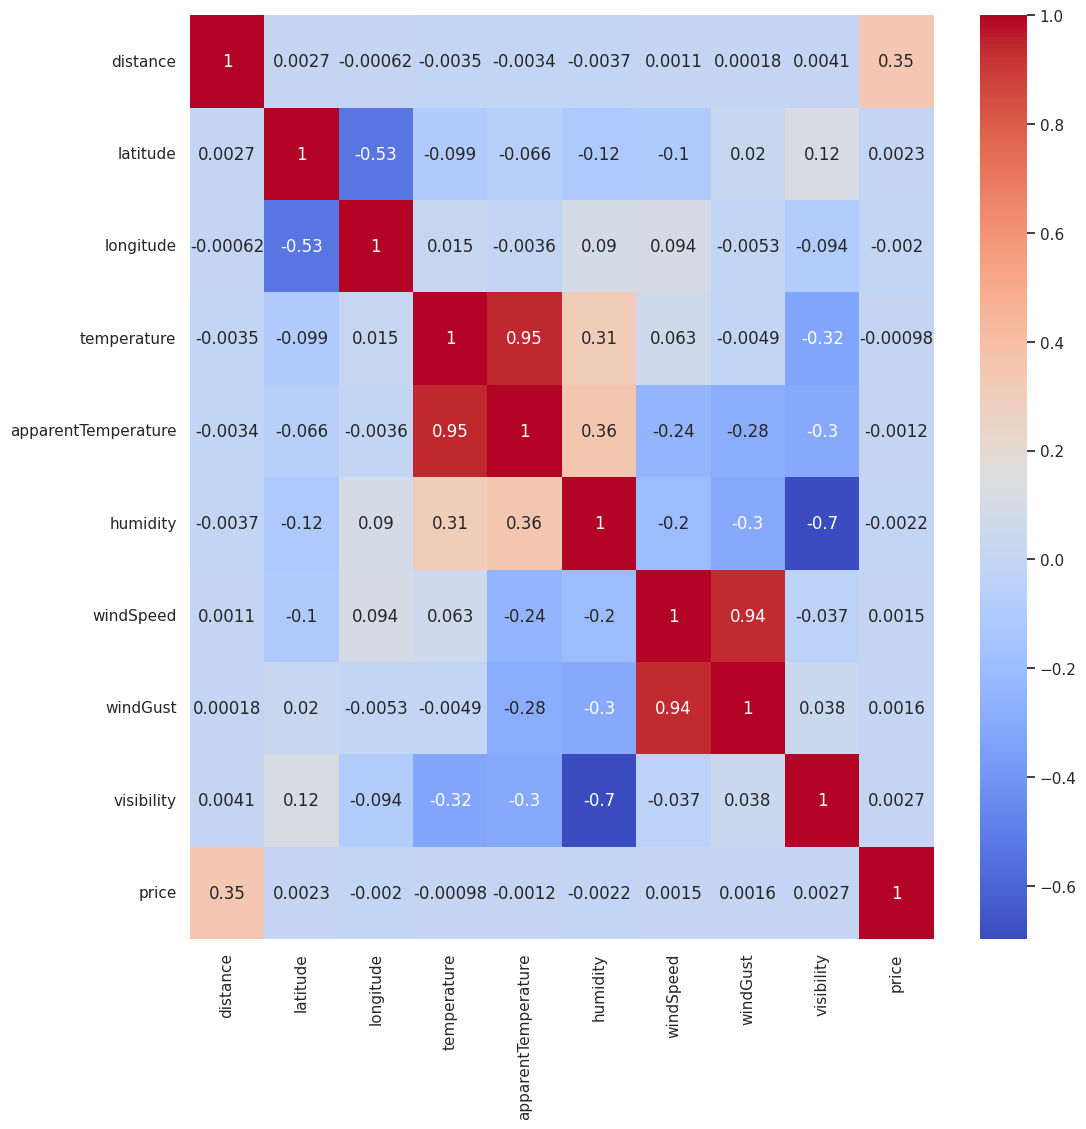

In [88]:
corr4 = ['distance','latitude','longitude','temperature','apparentTemperature',
 'humidity','windSpeed','windGust','visibility', 'price']
cor = processed_rideshare_data[corr4].corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor,annot=True,cmap='coolwarm')

In [89]:

#processed_rideshare_data.drop(['windSpeed', 'windGust','temperature', 'visibility','longitude','humidity', 'apparentTemperature','latitude'],axis=1,inplace=True)

In [90]:
#columns_to_drop = ['long_summary', 'day', 'name', 'short_summary', 'datetime', 'temperatureMax','apparentTemperatureMax', 'apparentTemperatureLowTime']
#data = processed_rideshare_data.drop(columns=columns_to_drop)
#data_uber = uber_rideshare_data.drop(columns=columns_to_drop)
#data_lyft = lyft_rideshare_data.drop(columns=columns_to_drop)

In [91]:
rideshare_data_desired.head(5)


timestamp  hour        day  month            datetime            source  \
0  1.544953e+09     9     Sunday     12 2018-12-16 09:30:08  Haymarket Square   
1  1.543284e+09     2    Tuesday     11 2018-11-27 02:00:24  Haymarket Square   
2  1.543367e+09     1  Wednesday     11 2018-11-28 01:00:22  Haymarket Square   
3  1.543554e+09     4     Friday     11 2018-11-30 04:53:03  Haymarket Square   
4  1.543463e+09     3   Thursday     11 2018-11-29 03:49:20  Haymarket Square   

     destination cab_type          name  price  ...  precipIntensityMax  \
0  North Station     Lyft        Shared    5.0  ...              0.1276   
1  North Station     Lyft           Lux   11.0  ...              0.1300   
2  North Station     Lyft          Lyft    7.0  ...              0.1064   
3  North Station     Lyft  Lux Black XL   26.0  ...              0.0000   
4  North Station     Lyft       Lyft XL    9.0  ...              0.0001   

    uvIndexTime  temperatureMin  temperatureMinTime  temperatureMax  \
0  1.544980e+09           39.89        1.545012e+09           43.68   
1  1.543252e+09           40.49        1.543234e+09           47.30   
2  1.543338e+09           35.36        1.543378e+09           47.55   
3  1.543507e+09           34.67        1.543550e+09           45.03   
4  1.543421e+09           33.10        1.543403e+09           42.18   

   temperatureMaxTime apparentTemperatureMin  apparentTemperatureMinTime  \
0        1.544969e+09                  33.73                1.545012e+09   
1        1.543252e+09                  36.20                1.543291e+09   
2        1.543320e+09                  31.04                1.543378e+09   
3        1.543511e+09                  30.30                1.543550e+09   
4        1.543421e+09                  29.11                1.543392e+09   

   apparentTemperatureMax  apparentTemperatureMaxTime  
0                   38.07                1.544958e+09  
1                   43.92                1.543252e+09  
2                   44.12                1.543320e+09  
3                   38.53                1.543511e+09  
4                   35.75                1.543421e+09  

[5 rows x 52 columns]

In [92]:
rideshare_data_desired.dtypes

timestamp                             float64
hour                                    int64
day                                  category
month                                   int64
datetime                       datetime64[ns]
source                               category
destination                          category
cab_type                             category
name                                 category
price                                 float64
distance                              float64
surge_multiplier                      float64
latitude                              float64
longitude                             float64
temperature                           float64
apparentTemperature                   float64
long_summary                         category
precipIntensity                       float64
precipProbability                     float64
humidity                              float64
windSpeed                             float64
windGust                          

In [93]:
for column in ['day','source', 'destination', 'cab_type', 'name', 'icon']:
    rideshare_data_desired[column] = rideshare_data_desired[column].cat.codes

In [94]:
rideshare_data_desired.head(3)

timestamp  hour  day  month            datetime  source  destination  \
0  1.544953e+09     9    3     12 2018-12-16 09:30:08       5            7   
1  1.543284e+09     2    5     11 2018-11-27 02:00:24       5            7   
2  1.543367e+09     1    6     11 2018-11-28 01:00:22       5            7   

   cab_type  name  price  ...  precipIntensityMax   uvIndexTime  \
0         0     7    5.0  ...              0.1276  1.544980e+09   
1         0     2   11.0  ...              0.1300  1.543252e+09   
2         0     5    7.0  ...              0.1064  1.543338e+09   

   temperatureMin  temperatureMinTime  temperatureMax  temperatureMaxTime  \
0           39.89        1.545012e+09           43.68        1.544969e+09   
1           40.49        1.543234e+09           47.30        1.543252e+09   
2           35.36        1.543378e+09           47.55        1.543320e+09   

  apparentTemperatureMin  apparentTemperatureMinTime  apparentTemperatureMax  \
0                  33.73                1.545012e+09                   38.07   
1                  36.20                1.543291e+09                   43.92   
2                  31.04                1.543378e+09                   44.12   

   apparentTemperatureMaxTime  
0                1.544958e+09  
1                1.543252e+09  
2                1.543320e+09  

[3 rows x 52 columns]

In [95]:
rideshare_data_desired.dtypes

timestamp                             float64
hour                                    int64
day                                      int8
month                                   int64
datetime                       datetime64[ns]
source                                   int8
destination                              int8
cab_type                                 int8
name                                     int8
price                                 float64
distance                              float64
surge_multiplier                      float64
latitude                              float64
longitude                             float64
temperature                           float64
apparentTemperature                   float64
long_summary                         category
precipIntensity                       float64
precipProbability                     float64
humidity                              float64
windSpeed                             float64
windGust                          

In [96]:
category_columns = rideshare_data_desired.select_dtypes(include=['category'])
rideshare_data_desired = pd.get_dummies(rideshare_data_desired, columns=category_columns.columns, drop_first=True)

In [97]:
rideshare_data_desired.dtypes

timestamp                                                                   float64
hour                                                                          int64
day                                                                            int8
month                                                                         int64
datetime                                                             datetime64[ns]
                                                                          ...      
long_summary_ Partly cloudy throughout the day.                                bool
long_summary_ Possible drizzle in the morning.                                 bool
long_summary_ Rain in the morning and afternoon.                               bool
long_summary_ Rain throughout the day.                                         bool
long_summary_ Rain until morning, starting again in the evening.               bool
Length: 61, dtype: object

In [98]:
rideshare_data_desired.dropna(inplace=True)

In [99]:
rideshare_data_desired = rideshare_data_desired.drop(columns='datetime')

In [100]:
rideshare_data_desired.columns

Index(['timestamp', 'hour', 'day', 'month', 'source', 'destination',
       'cab_type', 'name', 'price', 'distance', 'surge_multiplier', 'latitude',
       'longitude', 'temperature', 'apparentTemperature', 'precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'windGust',
       'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime',
       'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure',
       'windBearing', 'cloudCover', 'uvIndex', 'ozone', 'sunriseTime',
       'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime',
       'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime',
       'long_summary_ Light rain in the morning and overnight

In [101]:
rideshare_data_desired = rideshare_data_desired.applymap(lambda x: int(x) if isinstance(x, bool) else x)

## feature Selection for Modeling

In [102]:
rideshare_data_desired.head(5)

timestamp  hour  day  month  source  destination  cab_type  name  price  \
0  1.544953e+09     9    3     12       5            7         0     7    5.0   
1  1.543284e+09     2    5     11       5            7         0     2   11.0   
2  1.543367e+09     1    6     11       5            7         0     5    7.0   
3  1.543554e+09     4    0     11       5            7         0     4   26.0   
4  1.543463e+09     3    4     11       5            7         0     6    9.0   

   distance  ...  long_summary_ Light rain in the morning and overnight.   \
0      0.44  ...                                                  0         
1      0.44  ...                                                  0         
2      0.44  ...                                                  0         
3      0.44  ...                                                  0         
4      0.44  ...                                                  0         

   long_summary_ Light rain in the morning.   \
0                                          0   
1                                          0   
2                                          1   
3                                          0   
4                                          0   

   long_summary_ Light rain until evening.   \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   long_summary_ Mostly cloudy throughout the day.   \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 1   

   long_summary_ Overcast throughout the day.   \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   long_summary_ Partly cloudy throughout the day.   \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 1   
4                                                 0   

   long_summary_ Possible drizzle in the morning.   \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   long_summary_ Rain in the morning and afternoon.   \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   long_summary_ Rain throughout the day.   \
0                                        1   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   long_summary_ Rain until morning, starting again in the evening.   
0                                                  0                  
1                                                  1                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

[5 rows x 60 columns]

In [103]:
from sklearn.linear_model import LinearRegression
X = rideshare_data_desired.drop(columns='price')
y = rideshare_data_desired['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
feature_names = X_train.columns
feature_scores = {}

for feature in feature_names:
    model = LinearRegression()
    model.fit(X_train[[feature]], y_train)
    feature_scores[feature] = model.score(X_train[[feature]], y_train)

In [105]:
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

In [106]:
sorted_features

[('name', 0.34494391646923295),
 ('distance', 0.12034115695331982),
 ('surge_multiplier', 0.05664938633588246),
 ('cab_type', 0.007030772094763771),
 ('destination', 0.002223465737437924),
 ('source', 0.0007776010594688909),
 ('day', 2.1950345356014367e-05),
 ('visibility', 1.4785241177928121e-05),
 ('humidity', 1.249903316258294e-05),
 ('longitude', 1.135715280553562e-05),
 ('latitude', 1.1327621440293534e-05),
 ('temperatureMin', 6.015549545046461e-06),
 ('apparentTemperatureMin', 5.9766850835085705e-06),
 ('dewPoint', 5.588676250556368e-06),
 ('temperatureHigh', 5.548256838849852e-06),
 ('temperatureMax', 5.016229184473531e-06),
 ('windGust', 4.498191679802588e-06),
 ('apparentTemperatureHigh', 4.205125947787103e-06),
 ('precipProbability', 3.903962043194653e-06),
 ('long_summary_ Light rain in the morning and overnight. ',
  3.6666737406321204e-06),
 ('apparentTemperatureMax', 3.6191893282300214e-06),
 ('ozone', 3.4196252475249267e-06),
 ('long_summary_ Rain in the morning and afte

In [107]:
top_features = [feature[0] for feature in sorted_features[:25]]  # Select the top k features

In [108]:
top_features

['name',
 'distance',
 'surge_multiplier',
 'cab_type',
 'destination',
 'source',
 'day',
 'visibility',
 'humidity',
 'longitude',
 'latitude',
 'temperatureMin',
 'apparentTemperatureMin',
 'dewPoint',
 'temperatureHigh',
 'temperatureMax',
 'windGust',
 'apparentTemperatureHigh',
 'precipProbability',
 'long_summary_ Light rain in the morning and overnight. ',
 'apparentTemperatureMax',
 'ozone',
 'long_summary_ Rain in the morning and afternoon. ',
 'windSpeed',
 'icon']

In [109]:
# Example: Assess correlation with target variable
selected_features_corr = rideshare_data_desired[top_features + ['price']].corr()

In [110]:
selected_features_corr

name  distance  \
name                                                1.000000  0.000215   
distance                                            0.000215  1.000000   
surge_multiplier                                   -0.068646  0.024359   
cab_type                                            0.286498  0.000280   
destination                                         0.000688 -0.150987   
source                                              0.000369 -0.090884   
day                                                -0.001962  0.001652   
visibility                                         -0.000208  0.004074   
humidity                                            0.000034 -0.003670   
longitude                                           0.001247 -0.000618   
latitude                                            0.000014  0.002702   
temperatureMin                                     -0.001006 -0.004069   
apparentTemperatureMin                             -0.001452 -0.004454   
dewPoint                                           -0.001343 -0.004223   
temperatureHigh                                    -0.001703 -0.005224   
temperatureMax                                     -0.001688 -0.005329   
windGust                                           -0.000468  0.000185   
apparentTemperatureHigh                            -0.001724 -0.004767   
precipProbability                                  -0.000118  0.001485   
long_summary_ Light rain in the morning and ove... -0.001479  0.002711   
apparentTemperatureMax                             -0.001741 -0.004986   
ozone                                               0.000998  0.001623   
long_summary_ Rain in the morning and afternoon.   -0.000544  0.000640   
windSpeed                                          -0.000509  0.001101   
icon                                               -0.000694  0.002549   
price                                              -0.586540  0.345793   

                                                    surge_multiplier  \
name                                                       -0.068646   
distance                                                    0.024359   
surge_multiplier                                            1.000000   
cab_type                                                   -0.163226   
destination                                                 0.000698   
source                                                     -0.037011   
day                                                         0.001915   
visibility                                                  0.003559   
humidity                                                   -0.002699   
longitude                                                  -0.003057   
latitude                                                    0.000558   
temperatureMin                                             -0.001650   
apparentTemperatureMin                                     -0.001923   
dewPoint                                                   -0.002523   
temperatureHigh                                            -0.002330   
temperatureMax                                             -0.002326   
windGust                                                    0.000618   
apparentTemperatureHigh                                    -0.002482   
precipProbability                                          -0.005218   
long_summary_ Light rain in the morning and ove...          0.000540   
apparentTemperatureMax                                     -0.002520   
ozone                                                       0.005003   
long_summary_ Rain in the morning and afternoon.            0.000270   
windSpeed                                                   0.001223   
icon                                                       -0.002293   
price                                                       0.238944   

                                                    cab_type  destination  \
name                               

In [111]:
X = rideshare_data_desired[top_features]
y = rideshare_data_desired['price']
X = X.apply(pd.to_numeric)
y = pd.to_numeric(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
# Train regression model using selected features
selected_model = LinearRegression()
selected_model.fit(X_train, y_train)

LinearRegression()

In [113]:
X_train.dtypes

name                                                         int64
distance                                                   float64
surge_multiplier                                           float64
cab_type                                                     int64
destination                                                  int64
source                                                       int64
day                                                          int64
visibility                                                 float64
humidity                                                   float64
longitude                                                  float64
latitude                                                   float64
temperatureMin                                             float64
apparentTemperatureMin                                     float64
dewPoint                                                   float64
temperatureHigh                                            flo

In [114]:
# Show model summary
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
y = y_train
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                 1.684e+04
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        21:06:25   Log-Likelihood:            -1.3066e+06
No. Observations:              397012   AIC:                         2.613e+06
Df Residuals:                  396986   BIC:                         2.613e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [115]:
X = rideshare_data_desired.drop(columns='price')
y = rideshare_data_desired['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
# Show model summary
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
y = y_train
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     7258.
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        21:06:30   Log-Likelihood:            -1.3065e+06
No. Observations:              397012   AIC:                         2.613e+06
Df Residuals:                  396953   BIC:                         2.614e+06
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [117]:
def backward_elimination(X, y, significance_level=0.05):
    num_vars = X.shape[1]
    for i in range(num_vars):
        regressor_OLS = sm.OLS(y, X).fit()
        max_p_value = max(regressor_OLS.pvalues)
        if max_p_value > significance_level:
            excluded_var = regressor_OLS.pvalues.idxmax()
            X = X.drop(columns=[excluded_var])
            print(f"Dropping '{excluded_var}' with p-value {max_p_value}")
        else:
            break
    return X, regressor_OLS


X_opt, final_model = backward_elimination(X_train, y_train)

# Print the summary of the final model
print(final_model.summary())

Dropping 'apparentTemperature' with p-value 0.9882890886577507
Dropping 'longitude' with p-value 0.8757877626751314
Dropping 'cloudCover' with p-value 0.8313204830045746
Dropping 'visibility' with p-value 0.8056393261383655
Dropping 'windGustTime' with p-value 0.8033303821678802
Dropping 'temperatureHighTime' with p-value 0.7549378420449772
Dropping 'temperatureLow' with p-value 0.7623992025440837
Dropping 'day' with p-value 0.7458809062617606
Dropping 'long_summary_ Light rain in the morning and overnight. ' with p-value 0.652251466339871
Dropping 'apparentTemperatureMin' with p-value 0.5877924583450157
Dropping 'humidity' with p-value 0.5344166230009348
Dropping 'dewPoint' with p-value 0.795636774173085
Dropping 'temperature' with p-value 0.8563874722745993
Dropping 'temperatureMinTime' with p-value 0.538326680712442
Dropping 'apparentTemperatureHigh' with p-value 0.7393215725167432
Dropping 'apparentTemperatureMax' with p-value 0.6215031641853739
Dropping 'temperatureMin' with p-val

In [118]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Predict the values
y_pred = final_model.predict(X_opt)

# Calculate metrics
r_squared = final_model.rsquared
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)

print(f'R-squared: {r_squared}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


R-squared: 0.5146368693342266
Mean Absolute Error (MAE): 5.167293763244527
Root Mean Squared Error (RMSE): 6.501484034133515


In [119]:
final_columns = X_opt.columns
final_columns

Index(['source', 'destination', 'cab_type', 'name', 'distance',
       'surge_multiplier', 'temperatureHigh', 'temperatureLowTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'sunriseTime',
       'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime',
       'temperatureMax', 'apparentTemperatureMinTime',
       'long_summary_ Light rain in the morning. ',
       'long_summary_ Light rain until evening. ',
       'long_summary_ Mostly cloudy throughout the day. ',
       'long_summary_ Overcast throughout the day. ',
       'long_summary_ Partly cloudy throughout the day. ',
       'long_summary_ Possible drizzle in the morning. ',
       'long_summary_ Rain throughout the day. '],
      dtype='object')

In [120]:
len(final_columns)

24

# Regression Trees

In [121]:
# Regression Trees
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [122]:
# Build a regression tree model with max_depth=3
model3 = DecisionTreeRegressor(random_state=0, max_depth=2)
model3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [123]:
# Make predictions on testing data
prediction_on_test = model3.predict(X_test)

In [124]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(y_test, prediction_on_test)
RMSE = mean_squared_error(y_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 4.253669476862898
RMSE: 5.5464721782182895


# Linear Regression on selected varibles

In [125]:
mae_models = []
rmse_models = []
model_scores = []

In [126]:
for col in rideshare_data.columns:
    if rideshare_data[col].dtype == "object":
        rideshare_data[col] = rideshare_data[col].astype("category")

In [127]:
for column in ['source', 'destination', 'cab_type','name', 'icon', 'product_id']:
    rideshare_data[column] = rideshare_data[column].cat.codes

In [128]:
from sklearn.linear_model import LinearRegression
rideshare_data.dropna(inplace=True)
X = rideshare_data[['month',	'source',	'destination','name',	'surge_multiplier', 'distance','uvIndex', 'product_id', 'icon']]
y = rideshare_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
rideshare_data.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [130]:
# Show model summary
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
y = y_train
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                 4.303e+04
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        21:09:35   Log-Likelihood:            -1.3149e+06
No. Observations:              397012   AIC:                         2.630e+06
Df Residuals:                  397002   BIC:                         2.630e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3014      0.279  

In [131]:
X2.dtypes

const               float64
month                 int64
source                 int8
destination            int8
name                   int8
surge_multiplier    float64
distance            float64
uvIndex             float64
product_id             int8
icon                   int8
dtype: object

In [132]:
linear = LinearRegression()
linear.fit(X_train, y_train)
score = linear.score(X_test, y_test)

In [133]:
score

0.4912433988240813

In [134]:
from sklearn import linear_model
model2 = linear_model.LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [135]:
# Make predictions on testing data
prediction_on_test = model2.predict(X_test)

In [136]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(y_test, prediction_on_test)
RMSE = mean_squared_error(y_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 5.299614715066884
RMSE: 6.649493963958809


In [137]:
X = rideshare_data_desired[final_columns]
y = rideshare_data_desired['price']
X = X.apply(pd.to_numeric)
y = pd.to_numeric(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Final Linear Regression

In [138]:
linear = LinearRegression()
linear.fit(X_train, y_train)
score = linear.score(X_test, y_test)
score

0.5115167257284308

In [139]:
model2 = linear_model.LinearRegression()
model2.fit(X_train, y_train)
prediction_on_test = model2.predict(X_test)
MAE = mean_absolute_error(y_test, prediction_on_test)
RMSE = mean_squared_error(y_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 5.181038111694355
RMSE: 6.515660039049424


In [140]:
mae_models.append(MAE)
rmse_models.append(RMSE)
model_scores.append(score)

# Decision Tree regressor

In [141]:
model3 = DecisionTreeRegressor(random_state=0, max_depth=2)
model3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [142]:
# Make predictions on testing data
prediction_on_test = model3.predict(X_test)

In [143]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(y_test, prediction_on_test)
RMSE = mean_squared_error(y_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 4.253669476862898
RMSE: 5.5464721782182895


In [144]:
mae_models.append(MAE)
rmse_models.append(RMSE)

[Text(0.5, 0.8333333333333334, 'name <= 4.5\nsquared_error = 87.088\nsamples = 397012\nvalue = 16.548'),
 Text(0.25, 0.5, 'distance <= 2.505\nsquared_error = 64.779\nsamples = 164233\nvalue = 24.829'),
 Text(0.125, 0.16666666666666666, 'squared_error = 42.099\nsamples = 101723\nvalue = 21.776'),
 Text(0.375, 0.16666666666666666, 'squared_error = 61.826\nsamples = 62510\nvalue = 29.798'),
 Text(0.75, 0.5, 'distance <= 2.195\nsquared_error = 20.306\nsamples = 232779\nvalue = 10.705'),
 Text(0.625, 0.16666666666666666, 'squared_error = 10.019\nsamples = 118504\nvalue = 8.909'),
 Text(0.875, 0.16666666666666666, 'squared_error = 24.156\nsamples = 114275\nvalue = 12.568')]

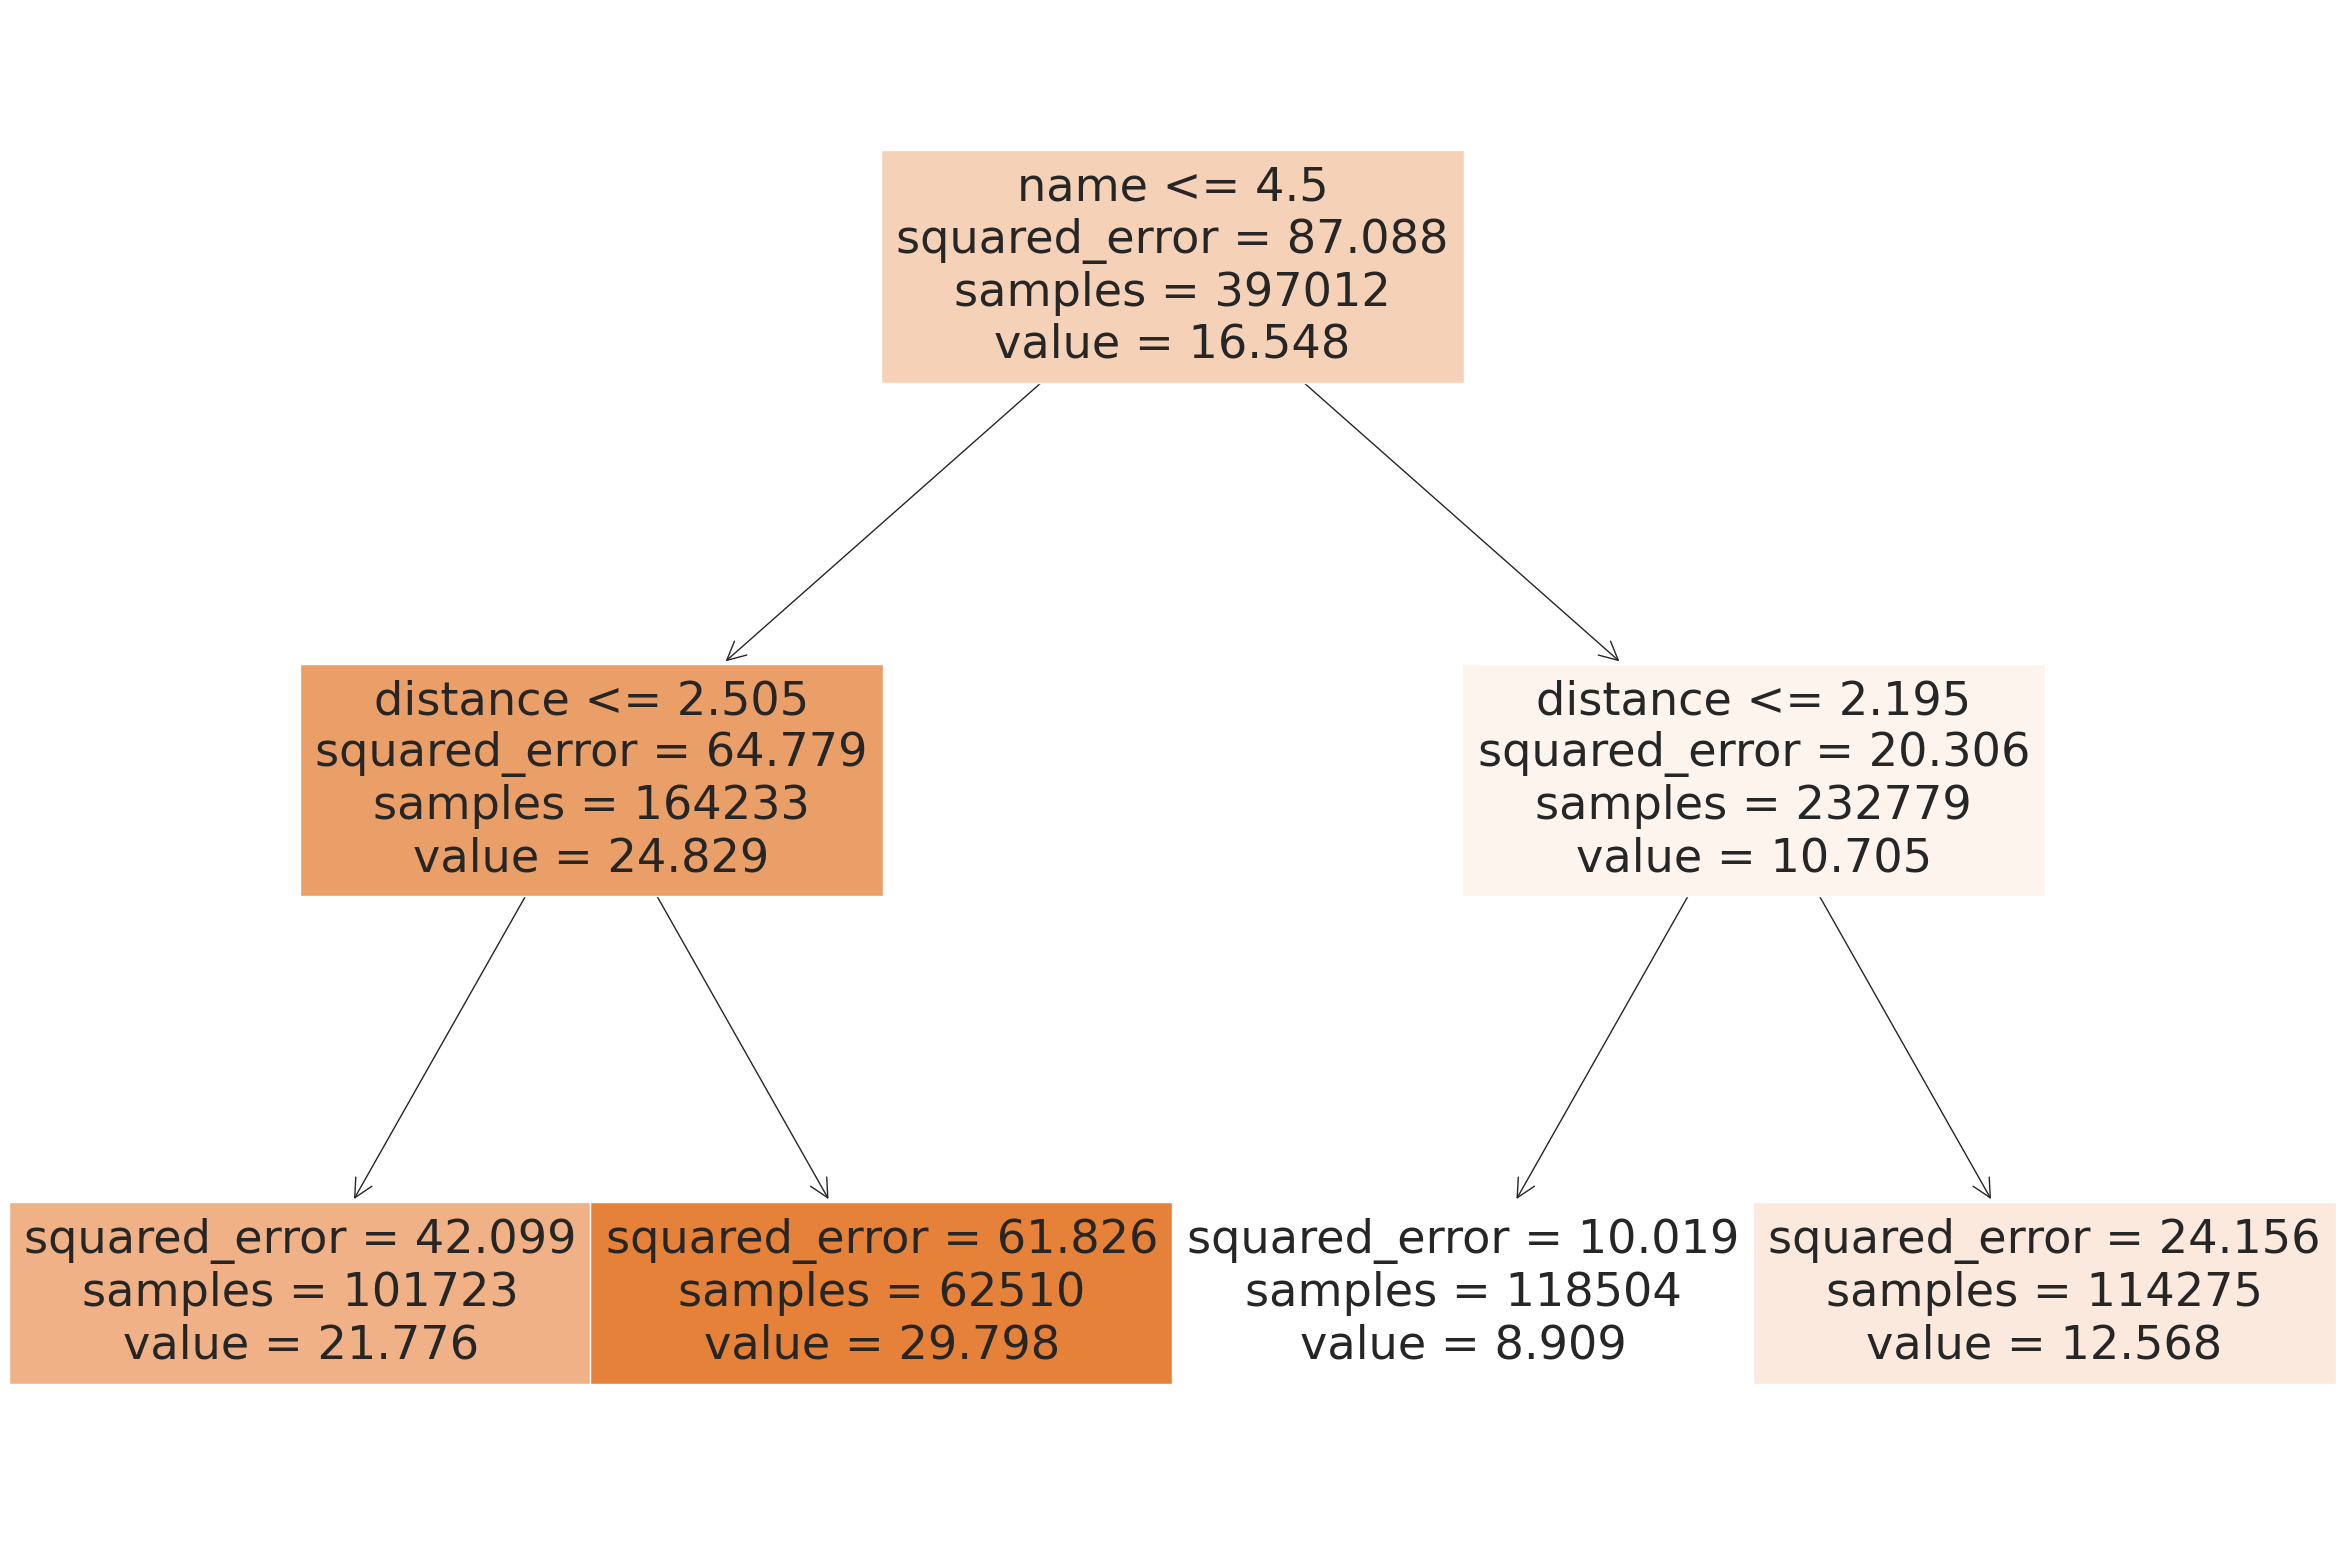

In [145]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model3,
               feature_names=list(X_train.columns),
               filled=True)

In [146]:
decision = DecisionTreeRegressor(random_state = 0)
decision.fit(X_train, y_train)
score = decision.score(X_test, y_test)
print(score)
model_scores.append(score)

0.9467359135418043


# MLP

In [147]:
from sklearn.neural_network import MLPRegressor

model_mlp = MLPRegressor(hidden_layer_sizes=(120, 96, 72), max_iter=1000, random_state=42)
model_mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(120, 96, 72), max_iter=1000, random_state=42)

In [148]:
prediction_on_test = model_mlp.predict(X_test)

In [149]:
from sklearn.metrics import make_scorer, r2_score
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(y_test, prediction_on_test)
RMSE = mean_squared_error(y_test, prediction_on_test, squared=False)
score = r2_score(y_test, prediction_on_test)
print("MAE:", MAE)
print("RMSE:", RMSE)
print("score", score)

MAE: 7.427496404214306
RMSE: 9.386075498913526
score -0.013680171768901461


## Random Forest Regressor

In [150]:
from sklearn.ensemble import RandomForestRegressor
model4 = RandomForestRegressor(n_estimators = 100, random_state = 0)
model4.fit(X_train , y_train)

RandomForestRegressor(random_state=0)

In [151]:
# Make predictions on testing data

prediction_on_test = model4.predict(X_test)

In [152]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(y_test, prediction_on_test)
RMSE = mean_squared_error(y_test, prediction_on_test, squared=False)
score = model4.score(X_test, y_test)
print("MAE:", MAE)
print("RMSE:", RMSE)
print("Score", model4.score(X_test, y_test))

MAE: 1.1423737743431421
RMSE: 1.8100881073123813
Score 0.9623007860525943


In [153]:
mae_models.append(MAE)
rmse_models.append(RMSE)
model_scores.append(score)

## Gradient Boosting Regressor

In [154]:
from sklearn import ensemble
model5 = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5)
model5.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [155]:
prediction_on_test = model5.predict(X_test)

In [156]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(y_test, prediction_on_test)
RMSE = mean_squared_error(y_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 1.079820717381669
RMSE: 1.6373135176965574


In [157]:
mae_models.append(MAE)
rmse_models.append(RMSE)

In [158]:
score = model5.score(X_test, y_test)
model_scores.append(score)

# K fold Cross validation

In [159]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores_GB = cross_val_score(model5, X_test, y_test, cv=kfold, scoring='neg_mean_squared_error')
scores_GB

array([-2.84140207, -2.75239862, -2.7516286 , -2.74193369, -2.87627534])

In [160]:
scores_RF = cross_val_score(model4, X_test, y_test, cv=kfold, scoring='neg_mean_squared_error')
scores_RF

array([-3.45024196, -3.39314743, -3.35726207, -3.40928514, -3.43915103])

In [161]:
scores_DT = cross_val_score(model3, X_test, y_test, cv=kfold, scoring='neg_mean_squared_error')
scores_DT

array([-31.0851003 , -29.90310298, -30.80610253, -31.0717397 ,
       -30.96512099])

In [162]:
scores_LR = cross_val_score(LinearRegression(), X_test, y_test, cv=kfold, scoring='neg_mean_squared_error')
scores_LR

array([-42.88838391, -41.68398759, -42.55856219, -42.65388106,
       -42.56665099])

In [163]:
scores_GB

array([-2.84140207, -2.75239862, -2.7516286 , -2.74193369, -2.87627534])

In [164]:
scores_RF

array([-3.45024196, -3.39314743, -3.35726207, -3.40928514, -3.43915103])

In [165]:
scores_DT

array([-31.0851003 , -29.90310298, -30.80610253, -31.0717397 ,
       -30.96512099])

In [166]:
scores_LR

array([-42.88838391, -41.68398759, -42.55856219, -42.65388106,
       -42.56665099])

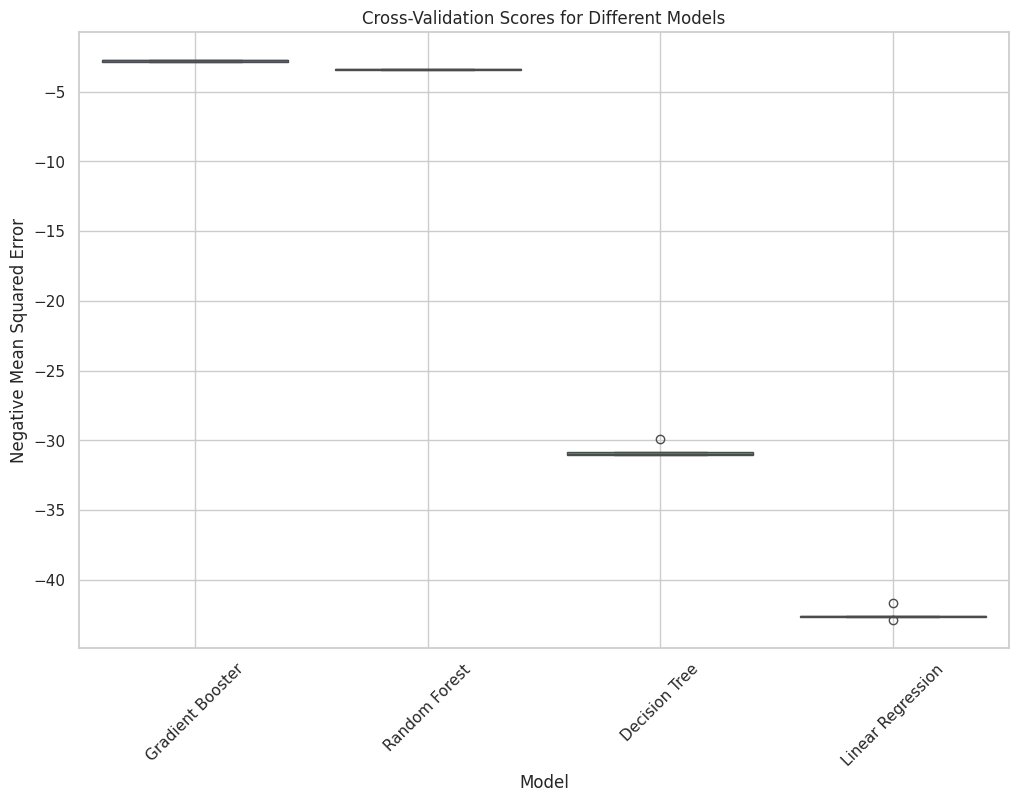

In [167]:
bmodels1 = ['Gradient Booster', 'Random Forest', 'Decision Tree', 'Linear Regression']
# Create a DataFrame
data = {
    'Gradient Booster': scores_GB,
    'Random Forest': scores_RF,
    'Decision Tree': scores_DT,
    'Linear Regression': scores_LR
}
df = pd.DataFrame(data)

# Plot the data
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Cross-Validation Scores for Different Models')
plt.ylabel('Negative Mean Squared Error')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Gradient Booster and Random Forest show strong performance, not just in high scores and low error metrics but also in having lower and more consistent MSE values in cross-validation.
Decision Tree and Linear Regression show poor performance both in cross-validation and earlier evaluated metrics (MAE, RMSE, and model scores).

In [168]:
models = ['Multiple Linear Regression', 'Regression Tree', 'Random Forest', 'Gradient Booster']

In [169]:
print(mae_models)
print(rmse_models)
print(model_scores)


[5.181038111694355, 4.253669476862898, 1.1423737743431421, 1.079820717381669]
[6.515660039049424, 5.5464721782182895, 1.8100881073123813, 1.6373135176965574]
[0.5115167257284308, 0.9467359135418043, 0.9623007860525943, 0.9691541629639102]


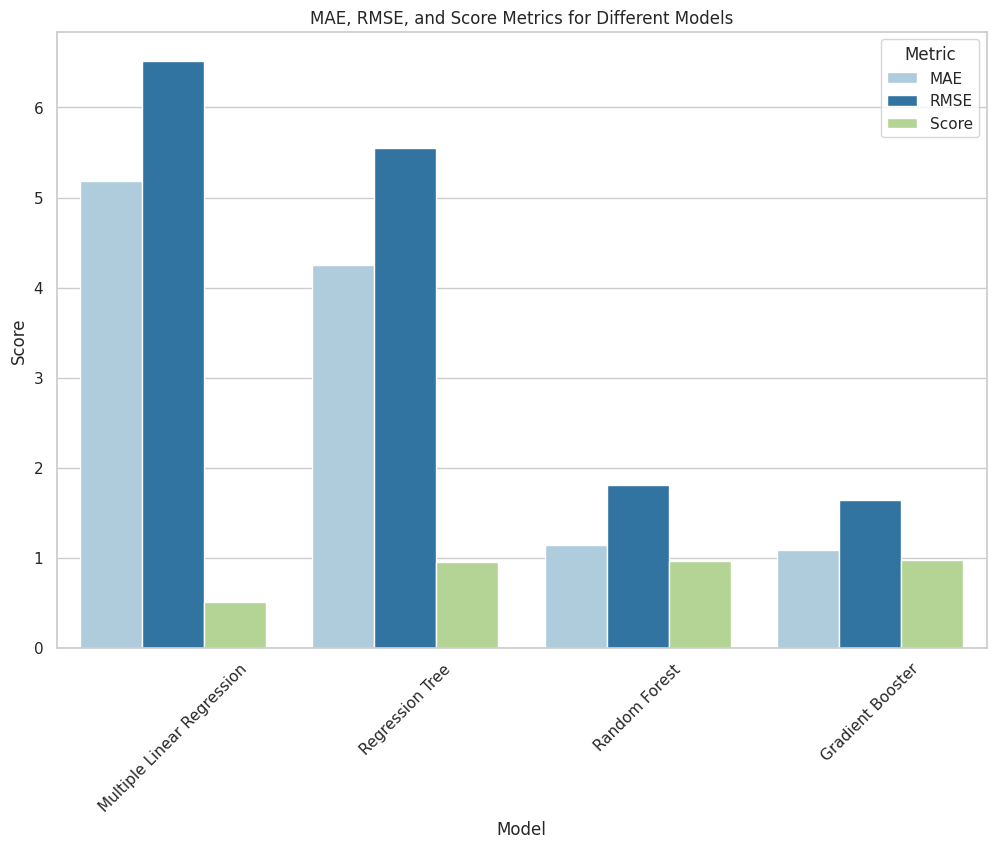

In [170]:
# Create a DataFrame to hold the data
df = pd.DataFrame({
    'Model': models * 3,
    'Score': mae_models + rmse_models + model_scores,
    'Metric': ['MAE'] * len(models) + ['RMSE'] * len(models) + ['Score'] * len(models)
})

# Plot the multiclass bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Model', y='Score', hue='Metric', palette='Paired')
plt.title('MAE, RMSE, and Score Metrics for Different Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.show()

**Multiple Linear Regression:**
MAE: The highest among the four, indicating that on average, the predictions are farther from the actual values.
RMSE: Also the highest, suggesting larger errors are typical, as RMSE gives a higher weight to larger errors.
Score: Significantly lower than the other models, indicating poor performance overall.
<br>
**Regression Tree:**
MAE and RMSE: Lower than Multiple Linear Regression but higher than both Random Forest and Gradient Booster, suggesting moderate error levels.
Score: Very high, close to Random Forest and Gradient Booster, which may indicate good performance in specific scenarios or with certain datasets.
<br>
**Random Forest:**
MAE and RMSE: Much lower than Multiple Linear Regression and Regression Tree, which implies better prediction accuracy with less variation.
Score: Very high, slightly less than Gradient Booster, but still indicates excellent overall performance.
<br>
**Gradient Booster:**
MAE and RMSE: The lowest among all models, indicating the most precise predictions with the smallest errors.
Score: The highest score, suggesting the best overall performance on the dataset used.
<br>
**Conclusions:**
The Gradient Booster is the best performing model across all metrics, offering the most accuracy and consistency in prediction.
Random Forest also performs well, nearly on par with Gradient Booster, and would be a good choice if, for instance, Gradient Booster's computational demands are too high.
The Regression Tree offers a good balance between complexity and performance, excelling particularly in scoring but not as well in error metrics.
The Multiple Linear Regression appears to be the least effective for this dataset based on the high error rates and low score, making it a less preferable choice unless model simplicity and interpretability are paramount.

In [176]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Another copy of ML_FinalProject_Uberprediction.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Another copy of ML_FinalProject_Uberprediction.ipynb to html
[NbConvertApp] Writing 4684627 bytes to /content/drive/MyDrive/Colab Notebooks/Another copy of ML_FinalProject_Uberprediction.html
